In [1]:
library(pacman)
p_load(fpp2, dplyr, repr)

In [2]:
y <- ts(c(123,39,78,52,110), start=2012)
y

A Time Series:
[1] 123  39  78  52 110

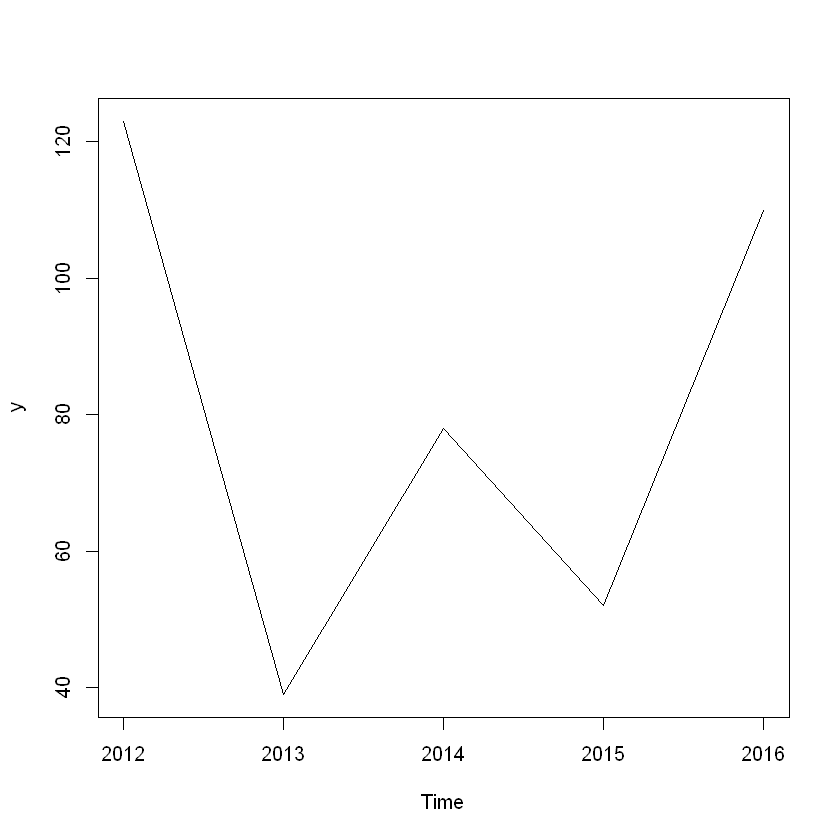

In [3]:
plot(y)

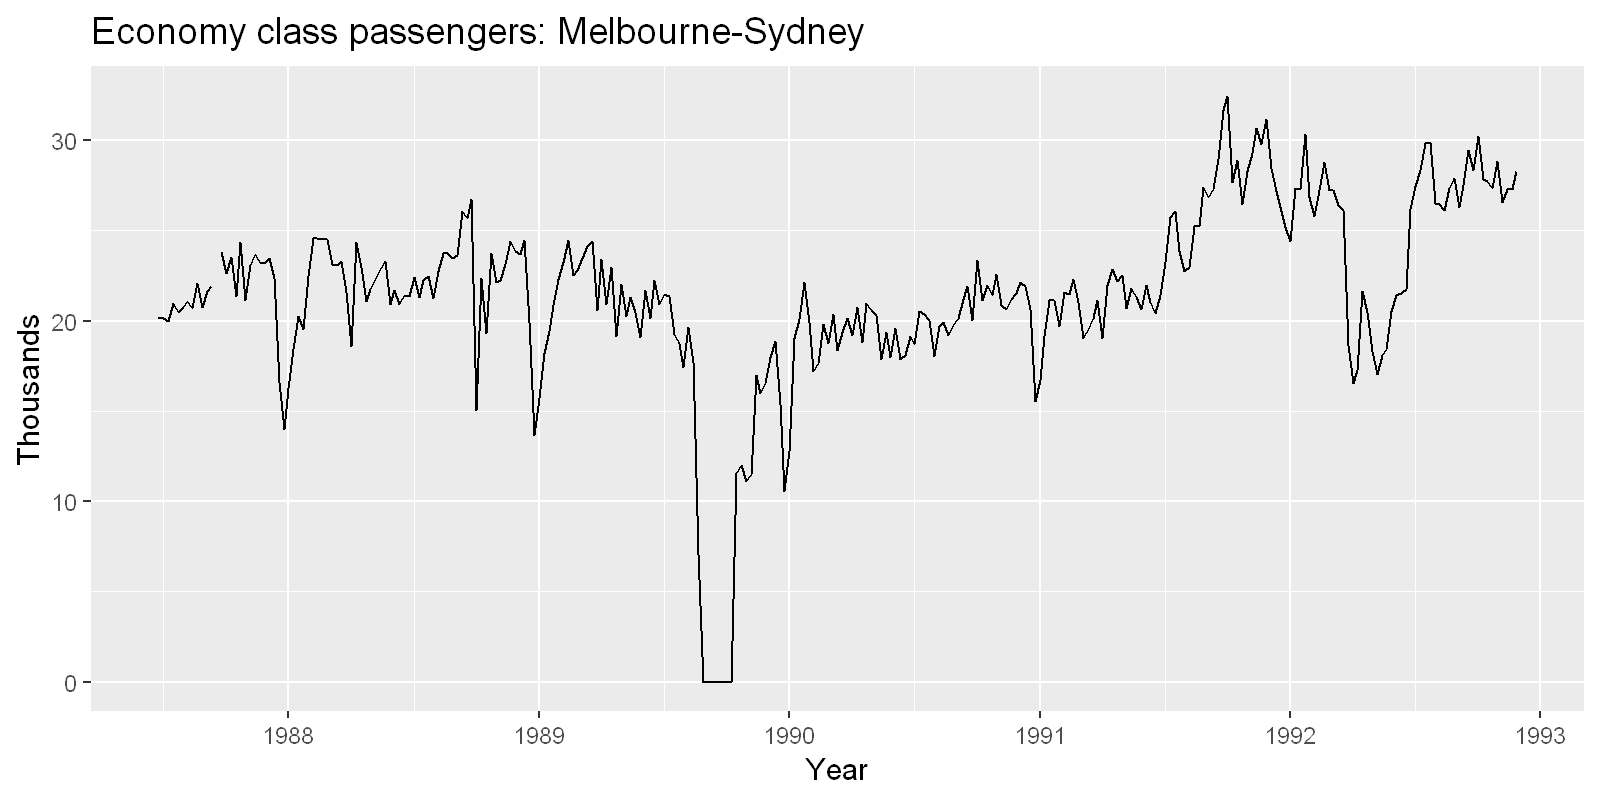

In [4]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 200)
autoplot(melsyd[,"Economy.Class"]) +
  ggtitle("Economy class passengers: Melbourne-Sydney") +
  xlab("Year") +
  ylab("Thousands")

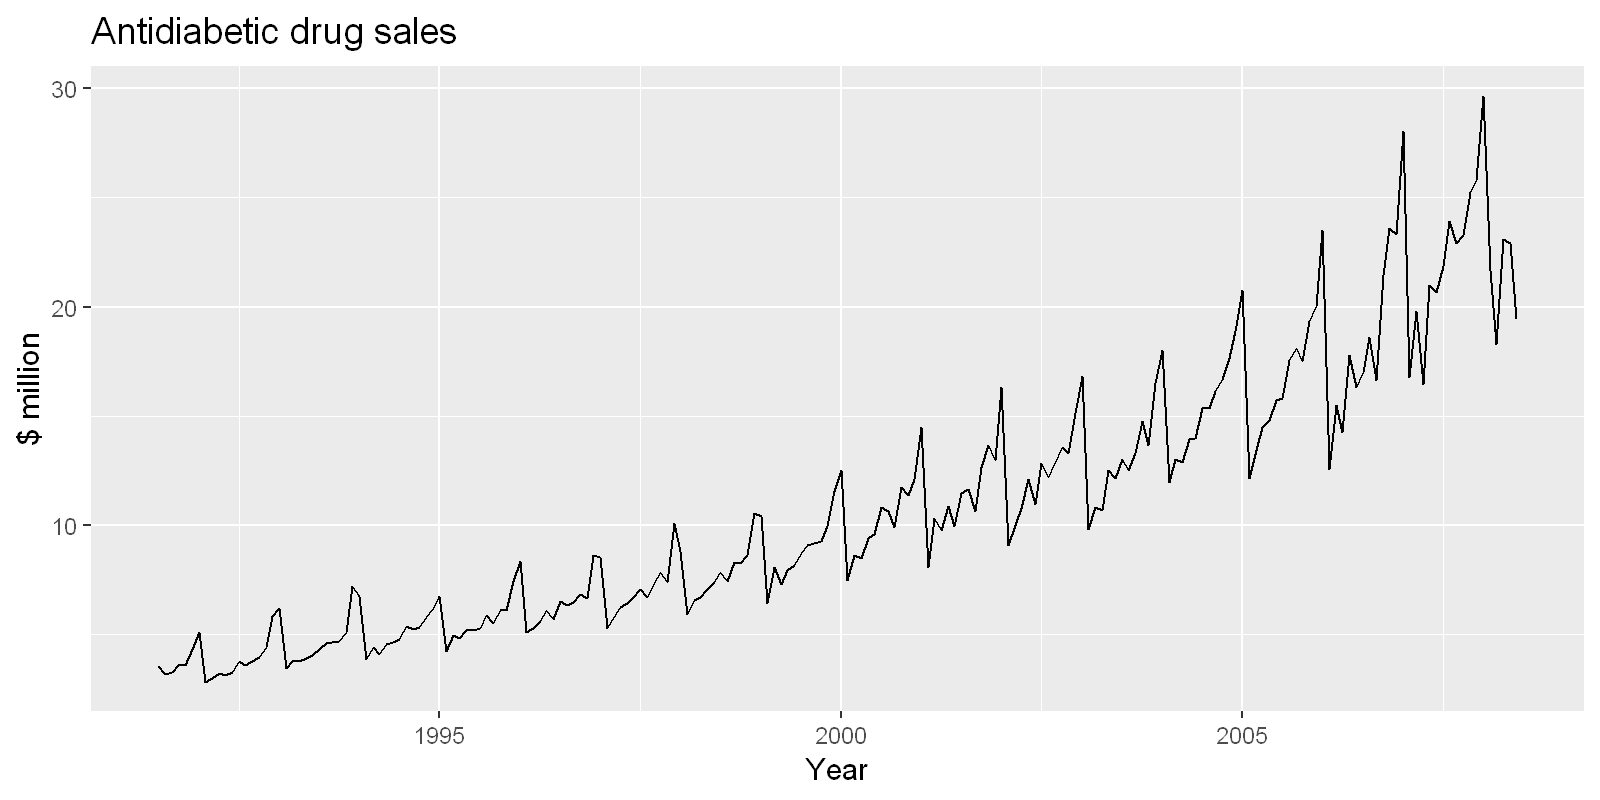

In [5]:
autoplot(a10) +
  ggtitle("Antidiabetic drug sales") +
  ylab("$ million") +
  xlab("Year")

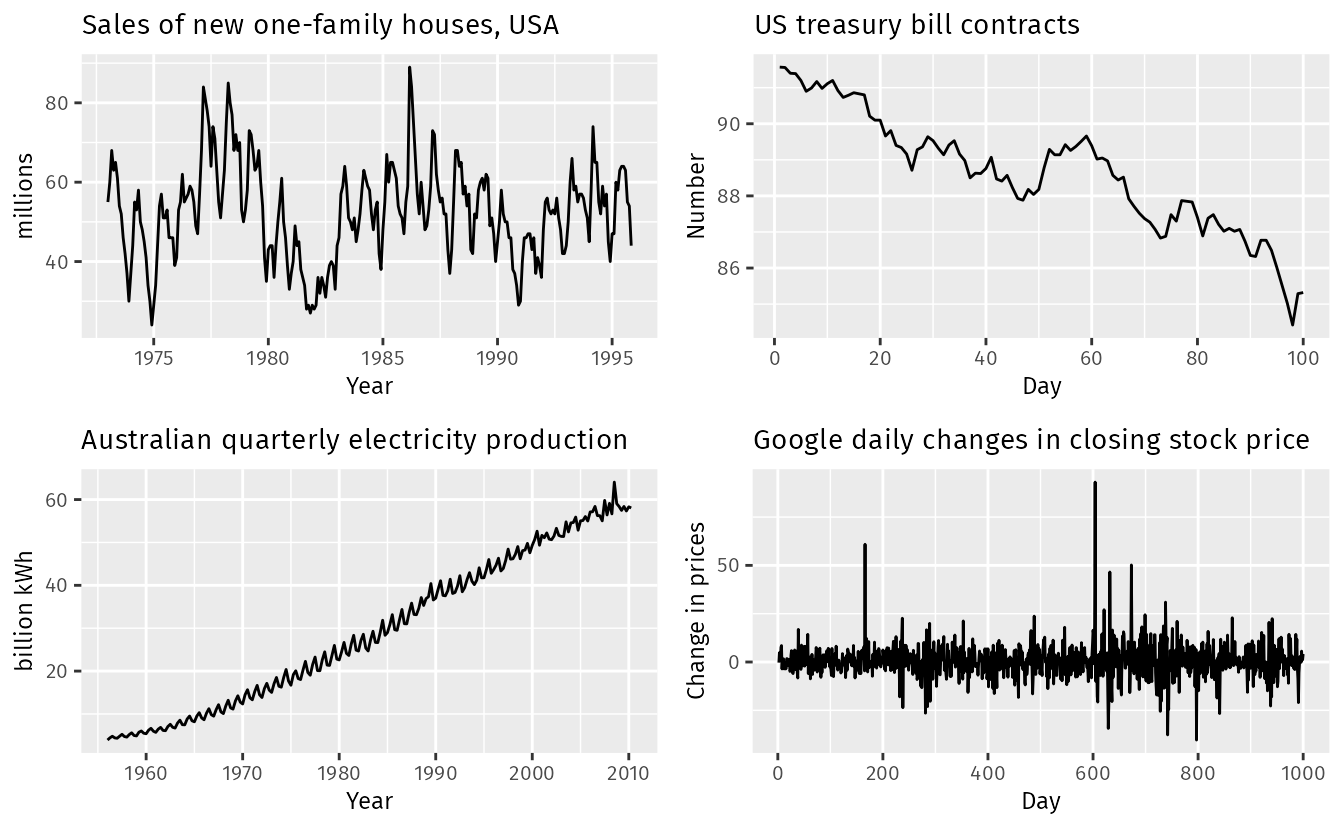

In [6]:
a10

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1991,,,,,,,3.526591,3.180891,3.252221,3.611003,3.565869,4.306371
1992,5.088335,2.814520,2.985811,3.204780,3.127578,3.270523,3.737851,3.558776,3.777202,3.924490,4.386531,5.810549
1993,6.192068,3.450857,3.772307,3.734303,3.905399,4.049687,4.315566,4.562185,4.608662,4.667851,5.093841,7.179962
1994,6.731473,3.841278,4.394076,4.075341,4.540645,4.645615,4.752607,5.350605,5.204455,5.301651,5.773742,6.204593
1995,6.749484,4.216067,4.949349,4.823045,5.194754,5.170787,5.256742,5.855277,5.490729,6.115293,6.088473,7.416598
1996,8.329452,5.069796,5.262557,5.597126,6.110296,5.689161,6.486849,6.300569,6.467476,6.828629,6.649078,8.606937
1997,8.524471,5.277918,5.714303,6.214529,6.411929,6.667716,7.050831,6.704919,7.250988,7.819733,7.398101,10.096233
1998,8.798513,5.918261,6.534493,6.675736,7.064201,7.383381,7.813496,7.431892,8.275117,8.260441,8.596156,10.558939
1999,10.391416,6.421535,8.062619,7.297739,7.936916,8.165323,8.717420,9.070964,9.177113,9.251887,9.933136,11.532974
2000,12.511462,7.457199,8.591191,8.474000,9.386803,9.560399,10.834295,10.643751,9.908162,11.710041,11.340151,12.079132


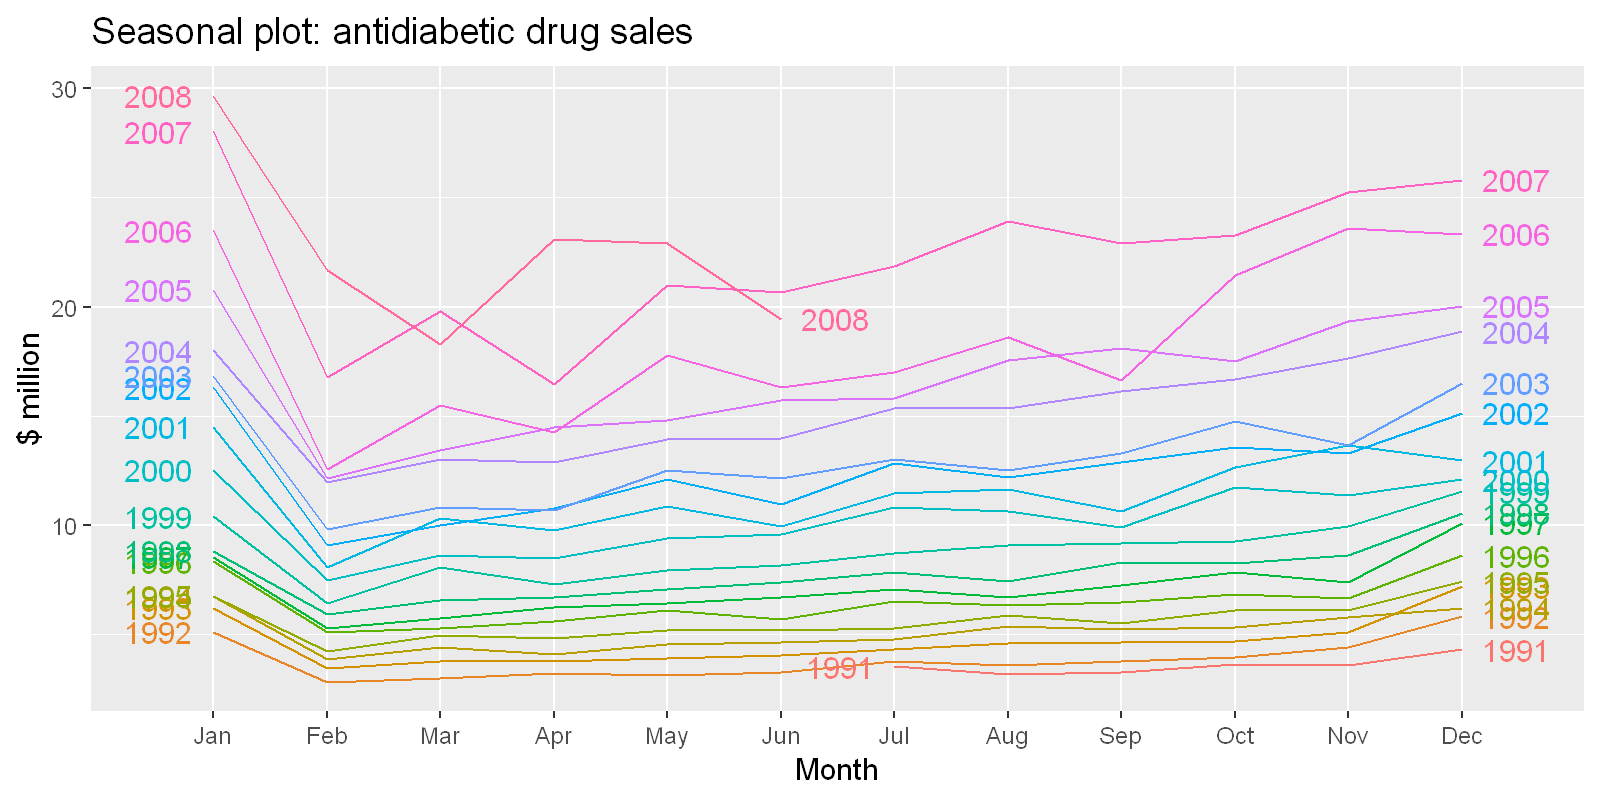

In [7]:
ggseasonplot(a10, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("$ million") +
  ggtitle("Seasonal plot: antidiabetic drug sales")

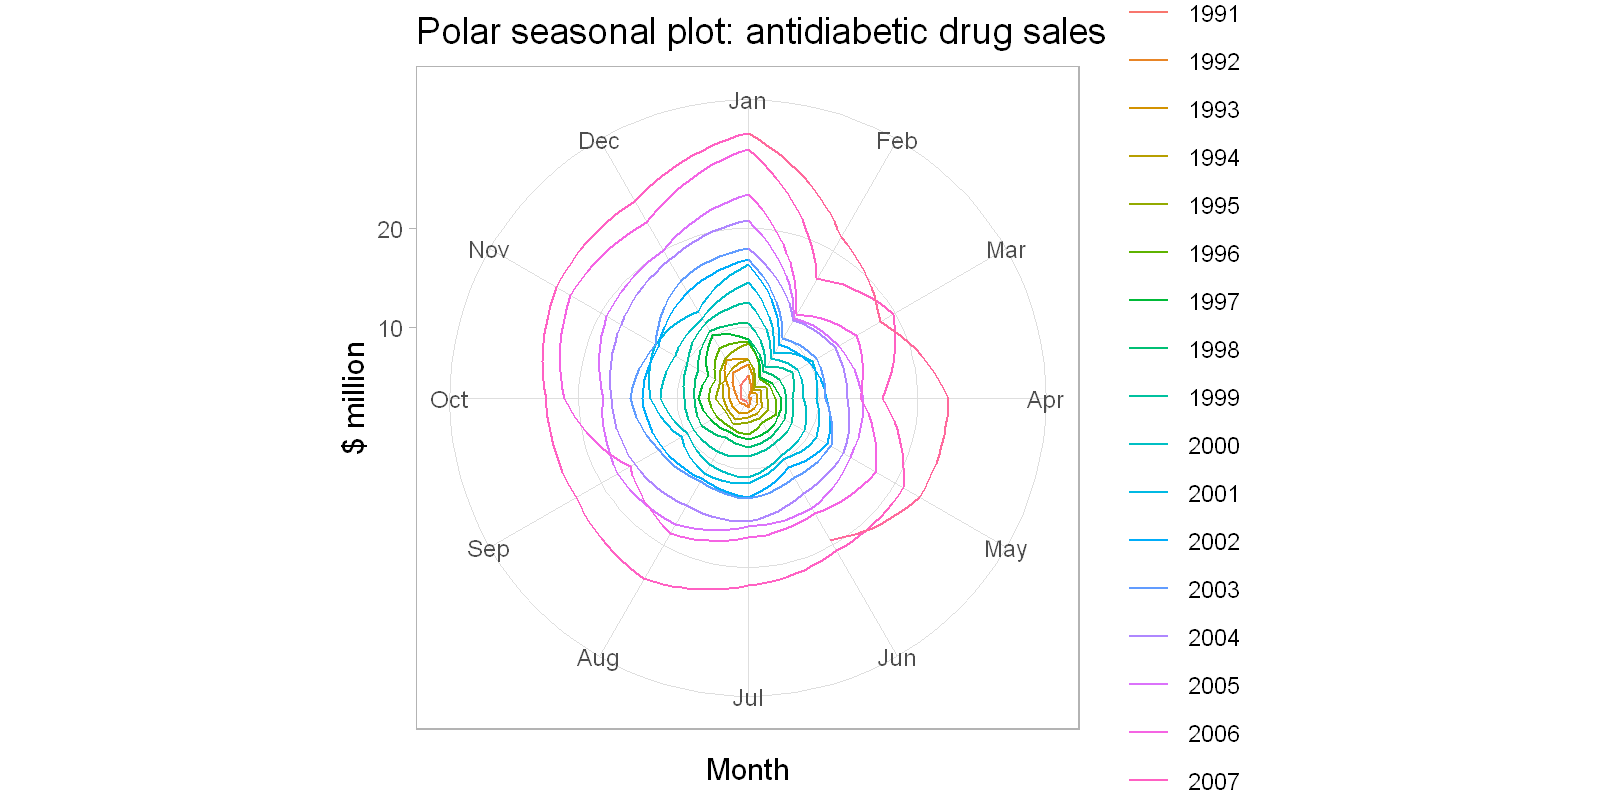

In [8]:
ggseasonplot(a10, polar=TRUE) +
  ylab("$ million") +
  ggtitle("Polar seasonal plot: antidiabetic drug sales") + theme_light()

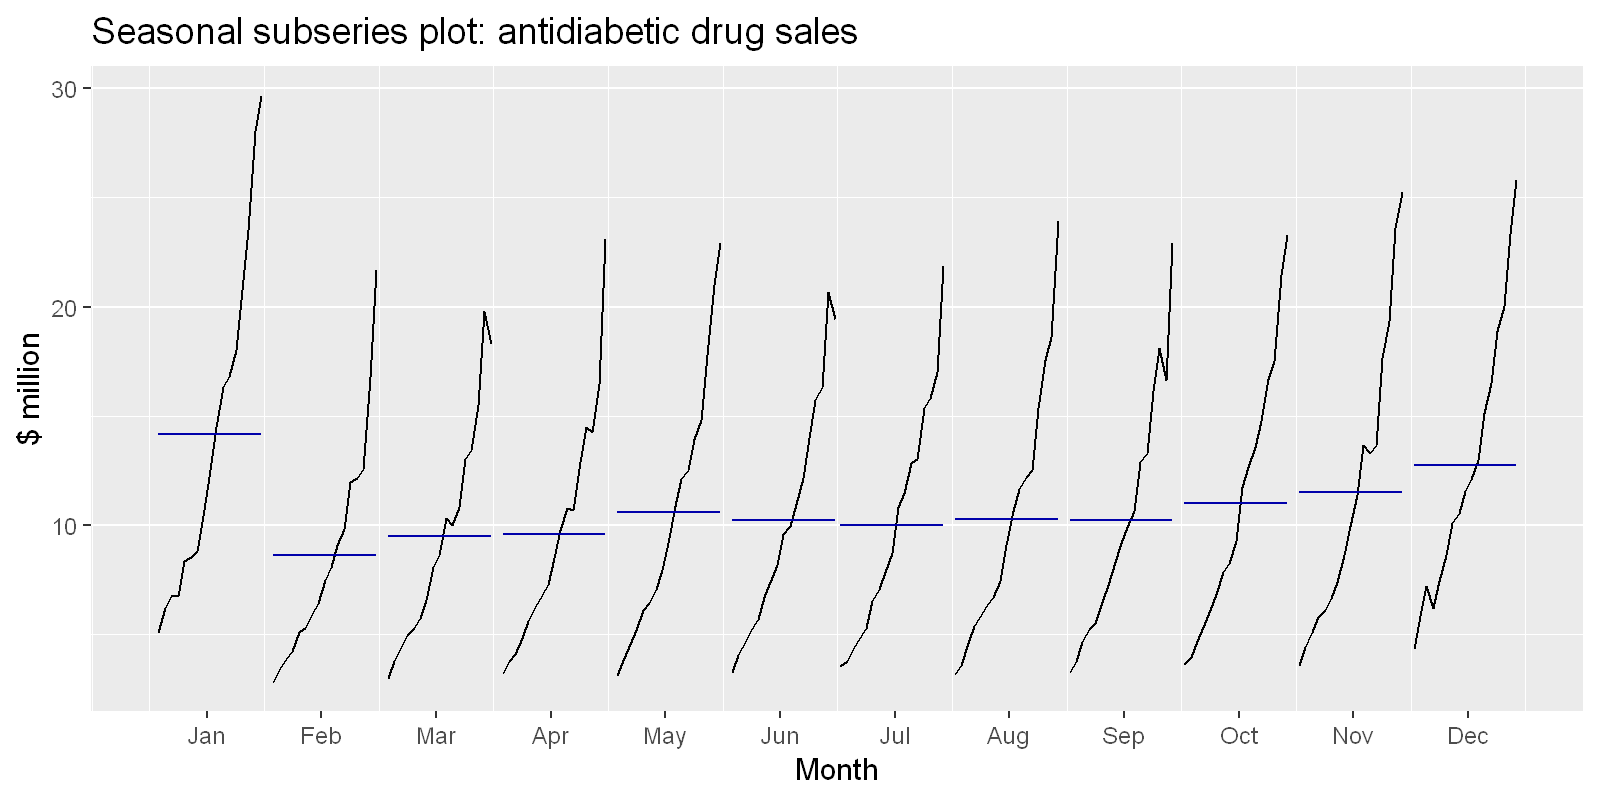

In [9]:
ggsubseriesplot(a10) +
  ylab("$ million") +
  ggtitle("Seasonal subseries plot: antidiabetic drug sales")

In [10]:
1+1

[1] 2

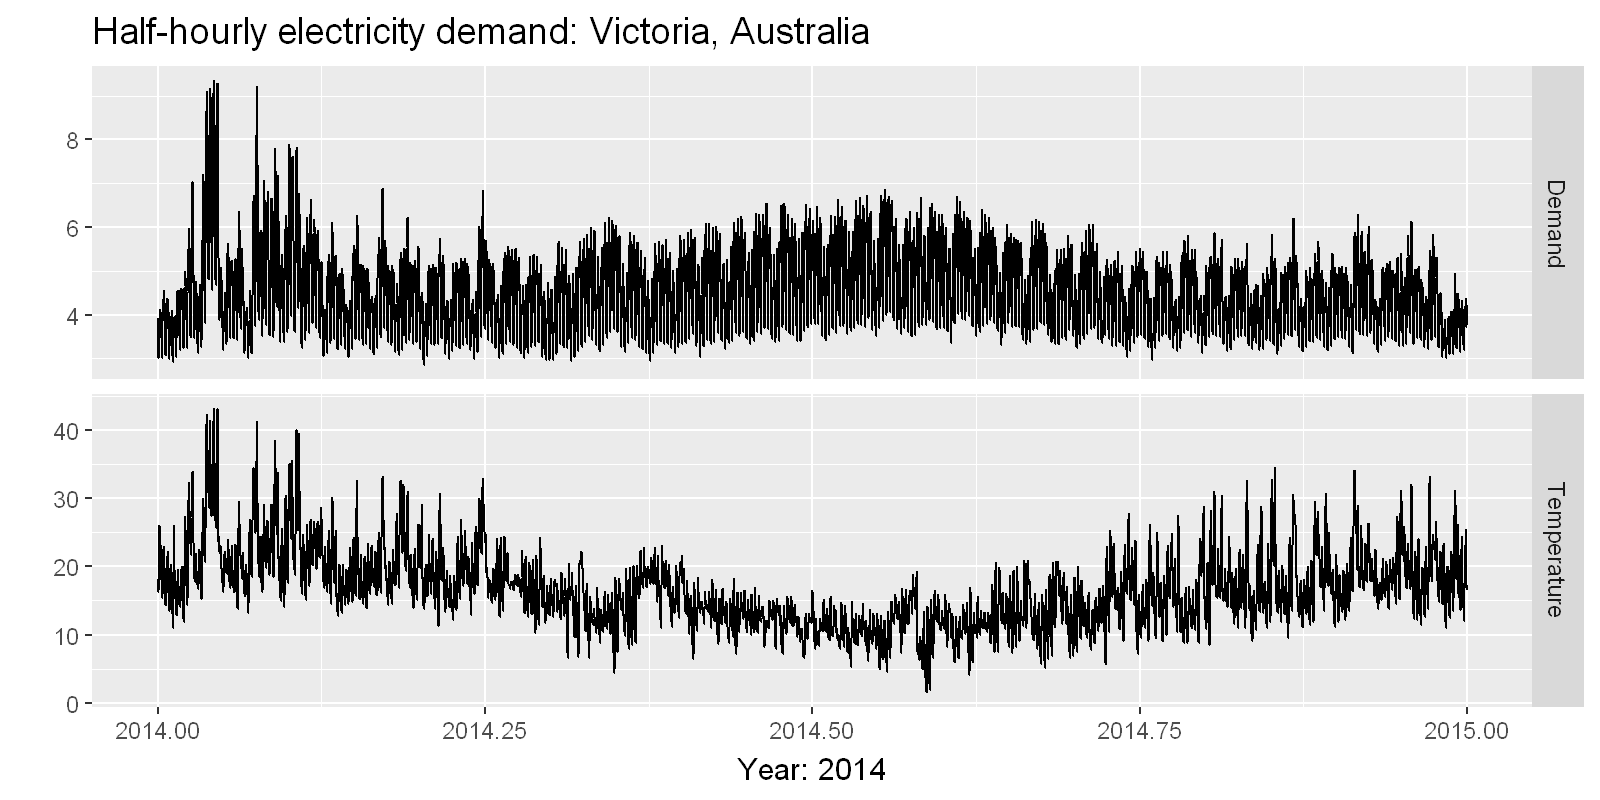

In [11]:
autoplot(elecdemand[,c("Demand","Temperature")], facets=TRUE) +
  xlab("Year: 2014") + ylab("") +
  ggtitle("Half-hourly electricity demand: Victoria, Australia")

Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."


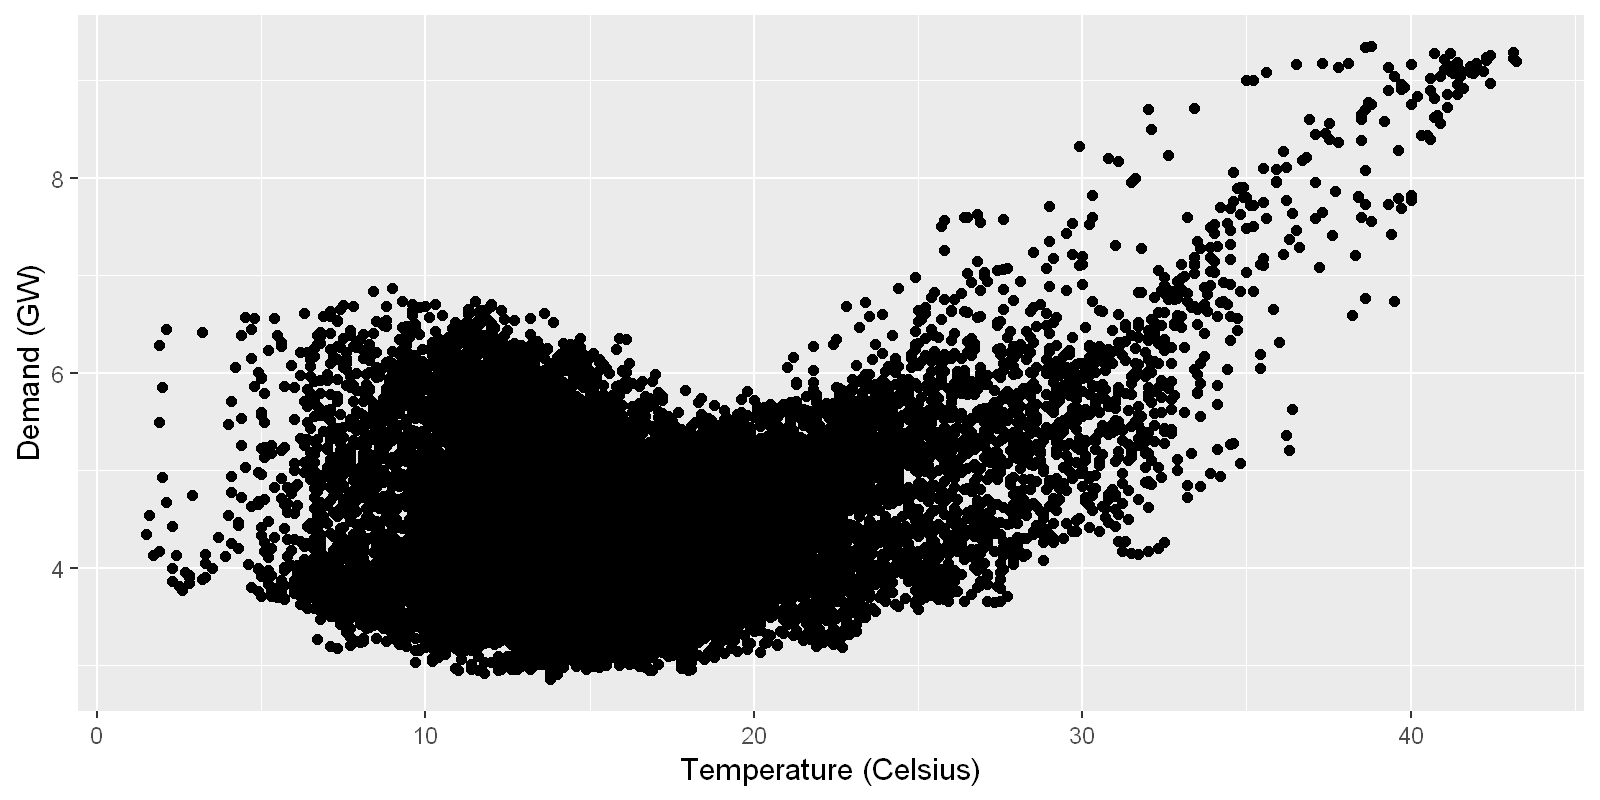

In [12]:
qplot(Temperature, Demand, data=as.data.frame(elecdemand)) +
  ylab("Demand (GW)") + xlab("Temperature (Celsius)")

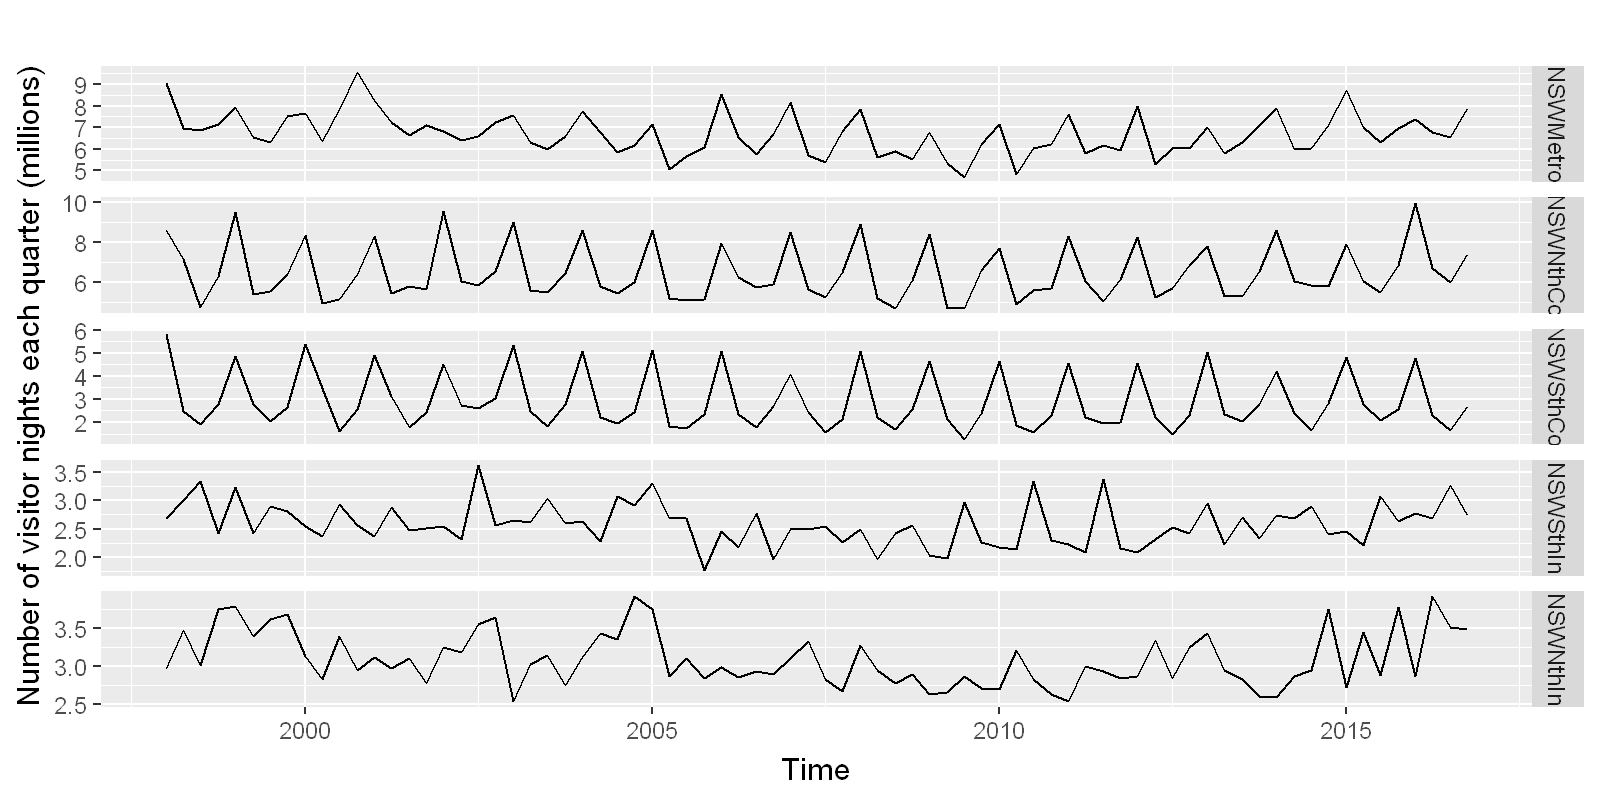

In [13]:
autoplot(visnights[,1:5], facets=TRUE) +
  ylab("Number of visitor nights each quarter (millions)")

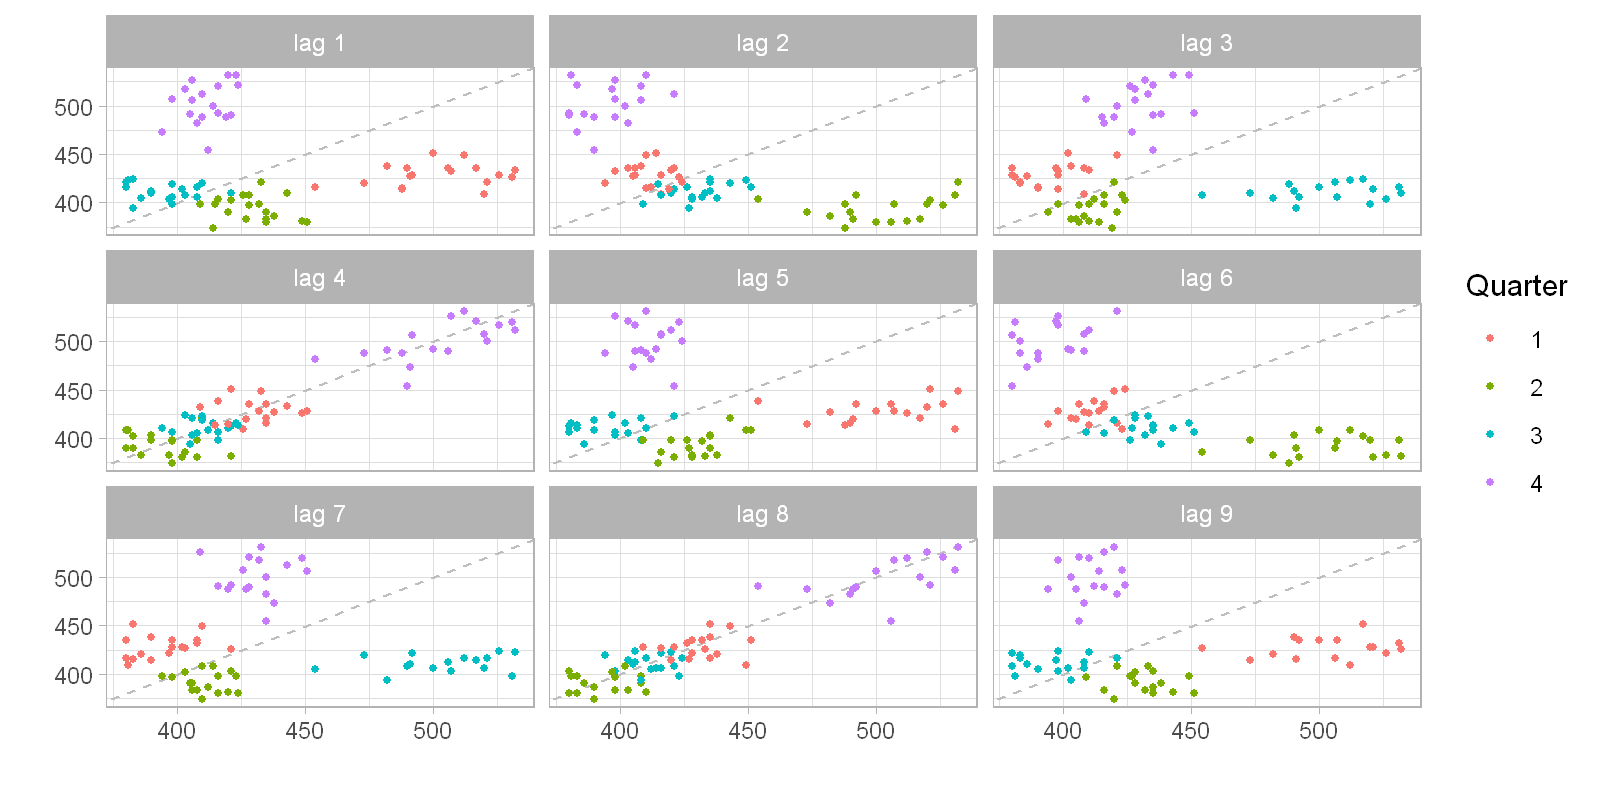

In [36]:
beer2 <- window(ausbeer, start=1992)
gglagplot(beer2, do.lines = F) + theme_light()

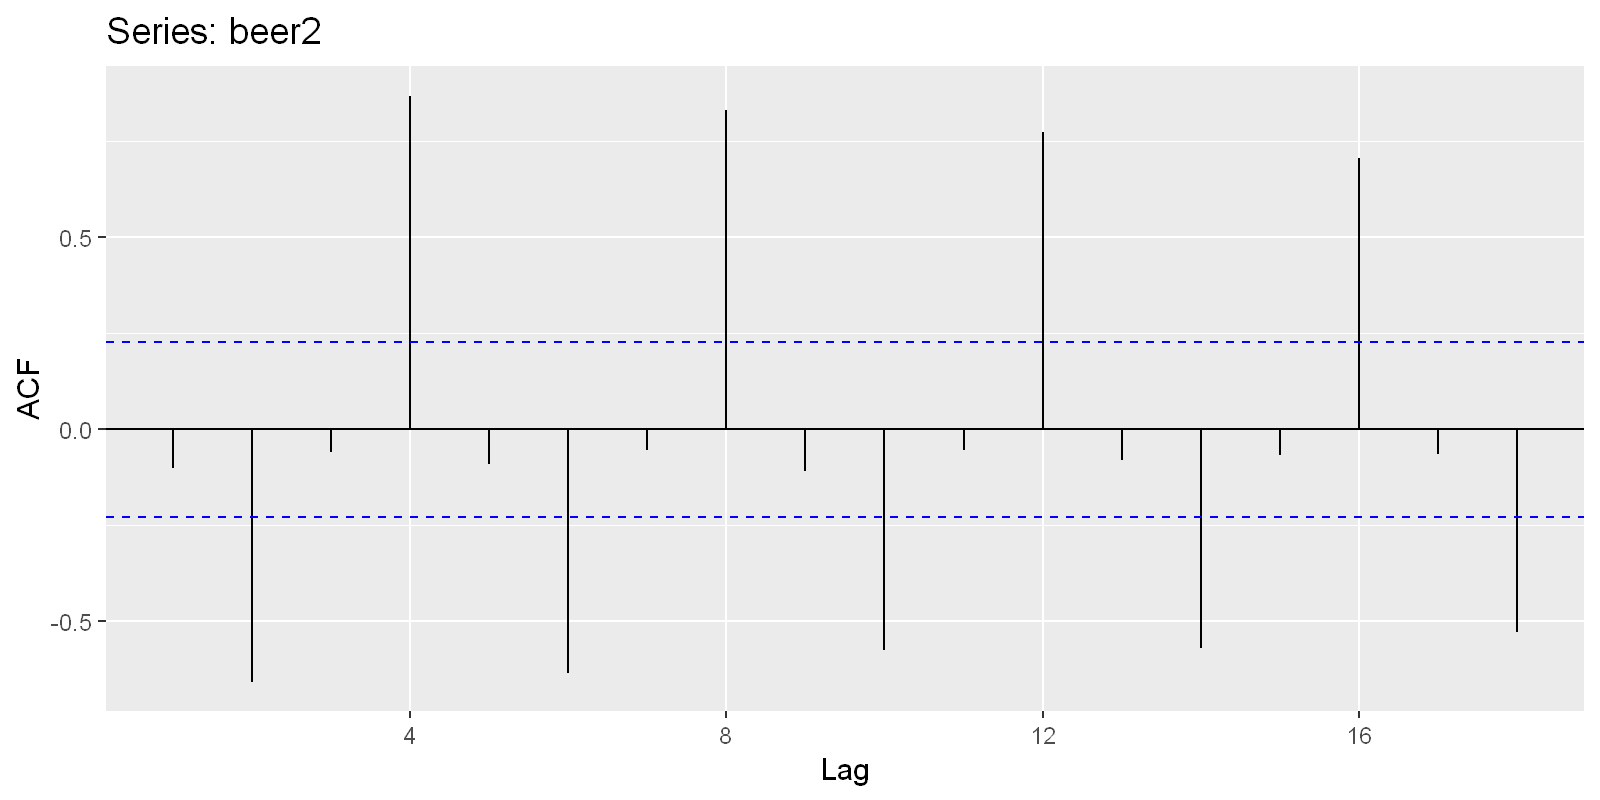

In [15]:
ggAcf(beer2)

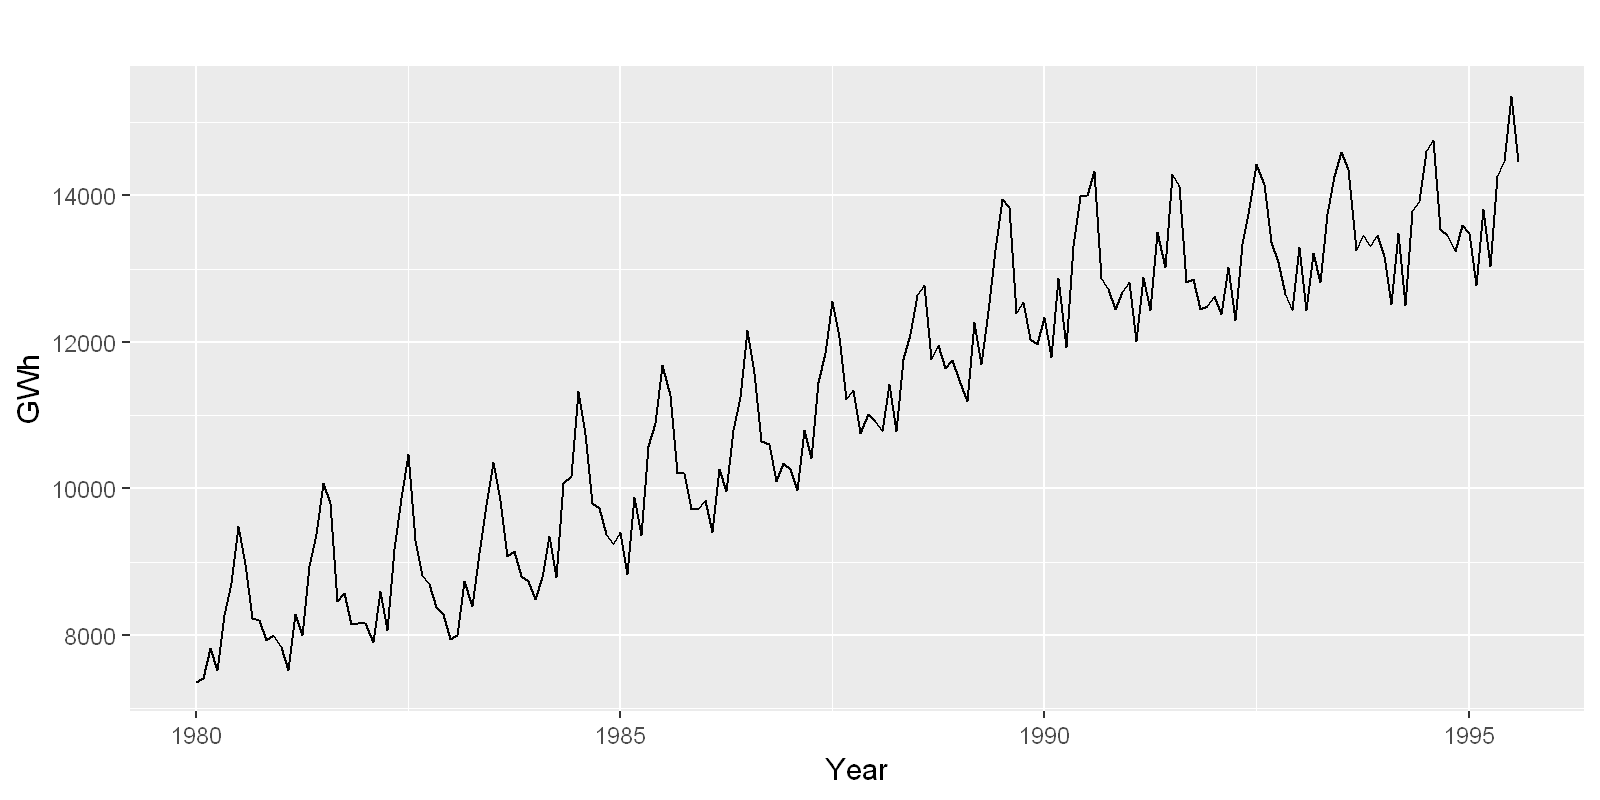

In [16]:
aelec <- window(elec, start=1980)
autoplot(aelec) + xlab("Year") + ylab("GWh")

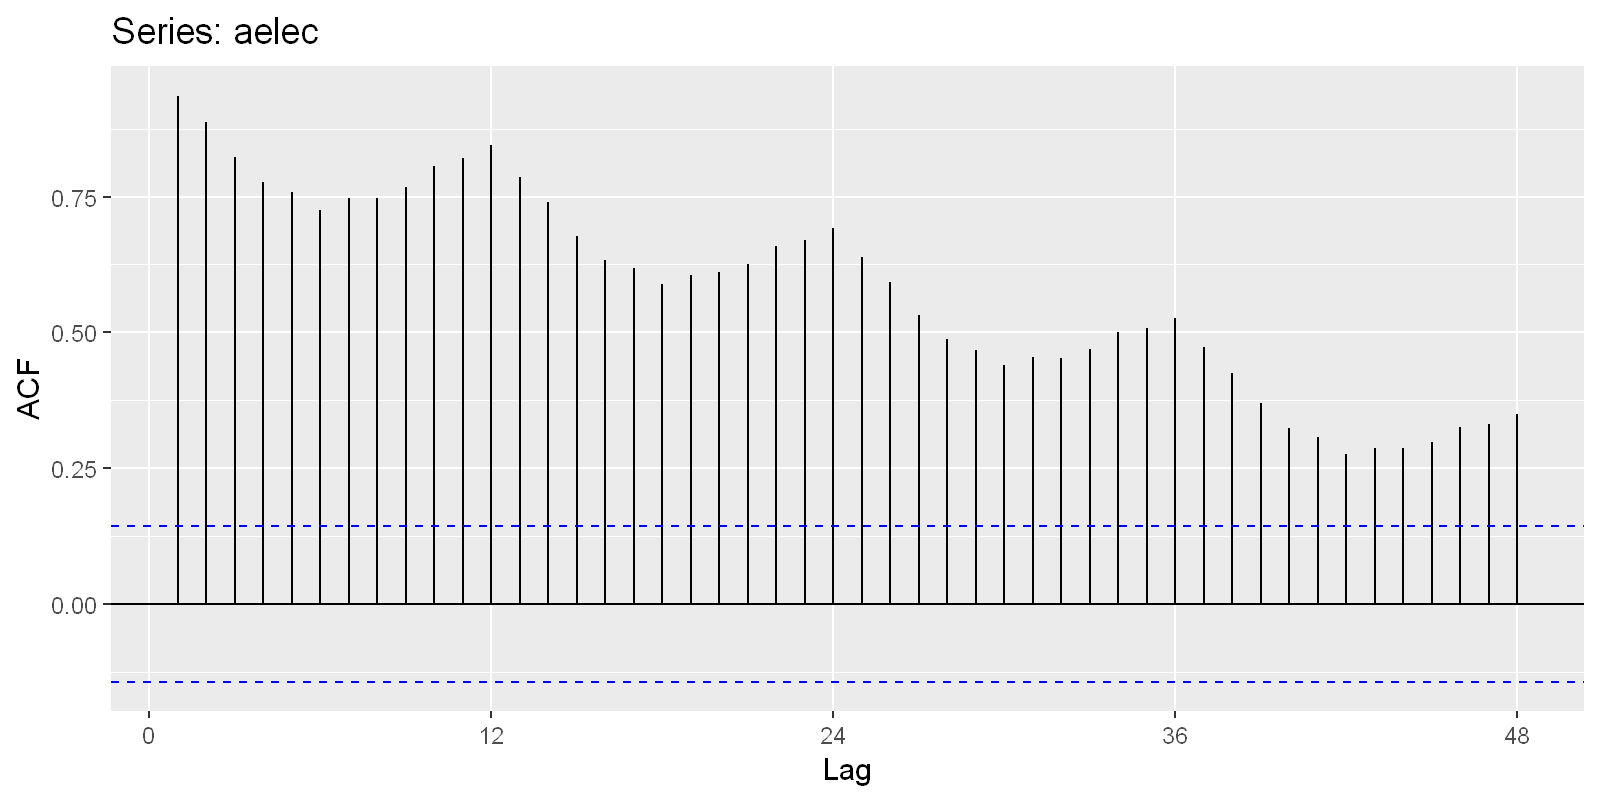

In [17]:
ggAcf(aelec, lag=48)

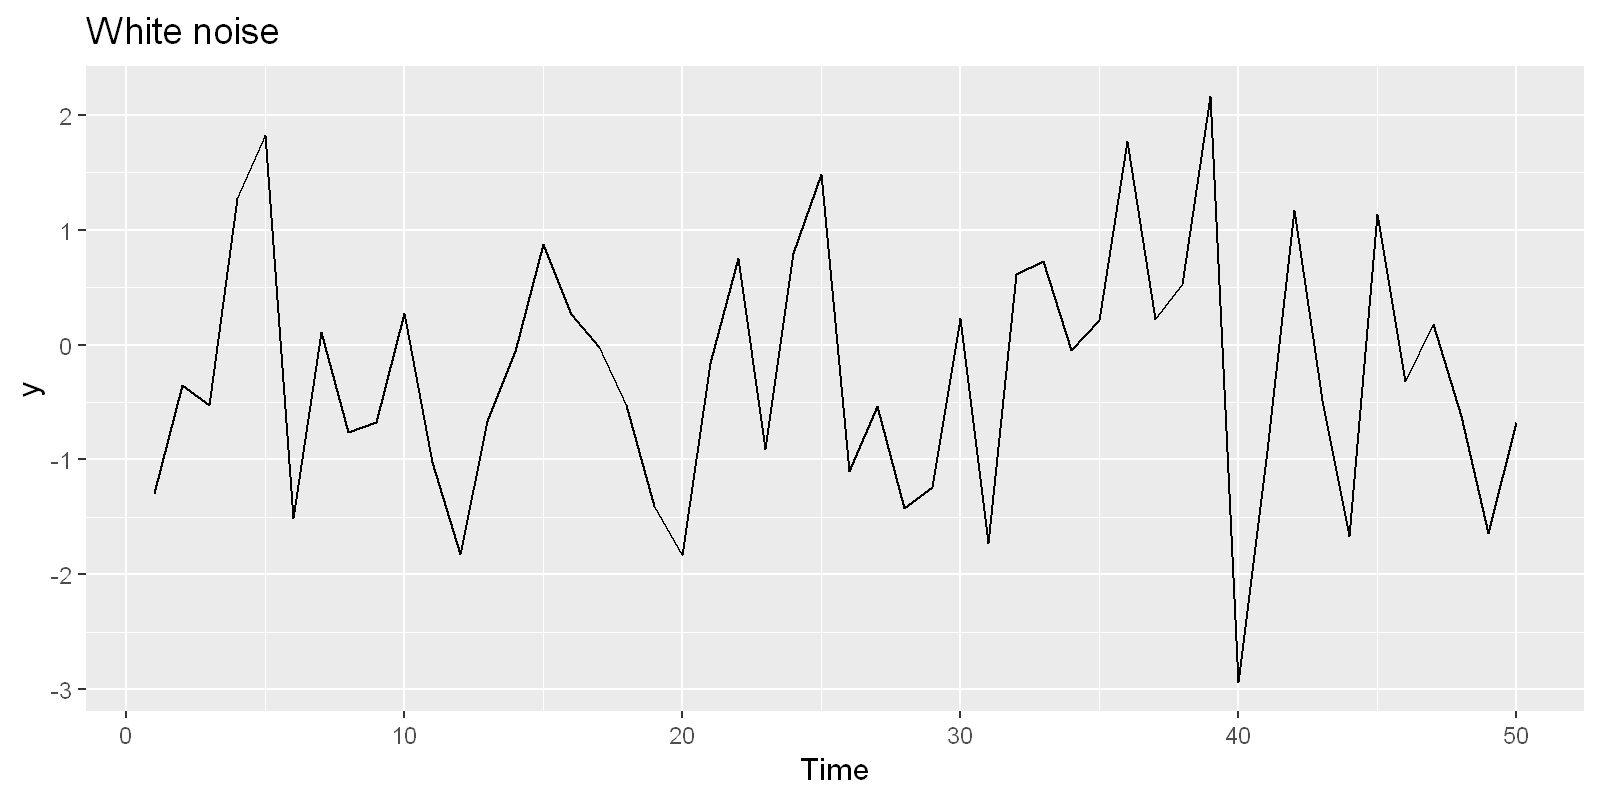

In [18]:
set.seed(30)
y <- ts(rnorm(50))
autoplot(y) + ggtitle("White noise")

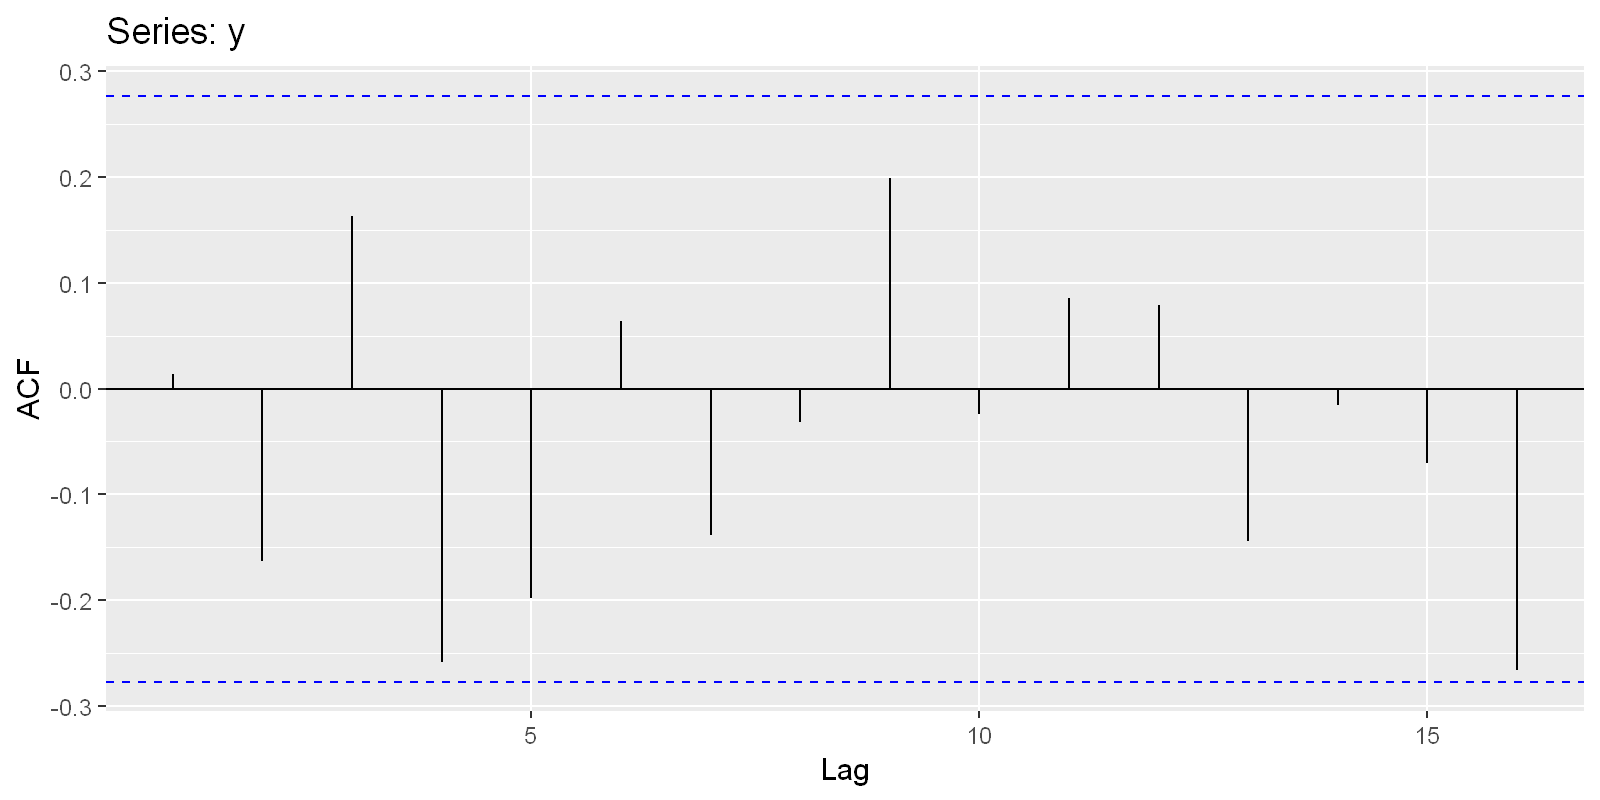

In [19]:
ggAcf(y)

# ~~ 2

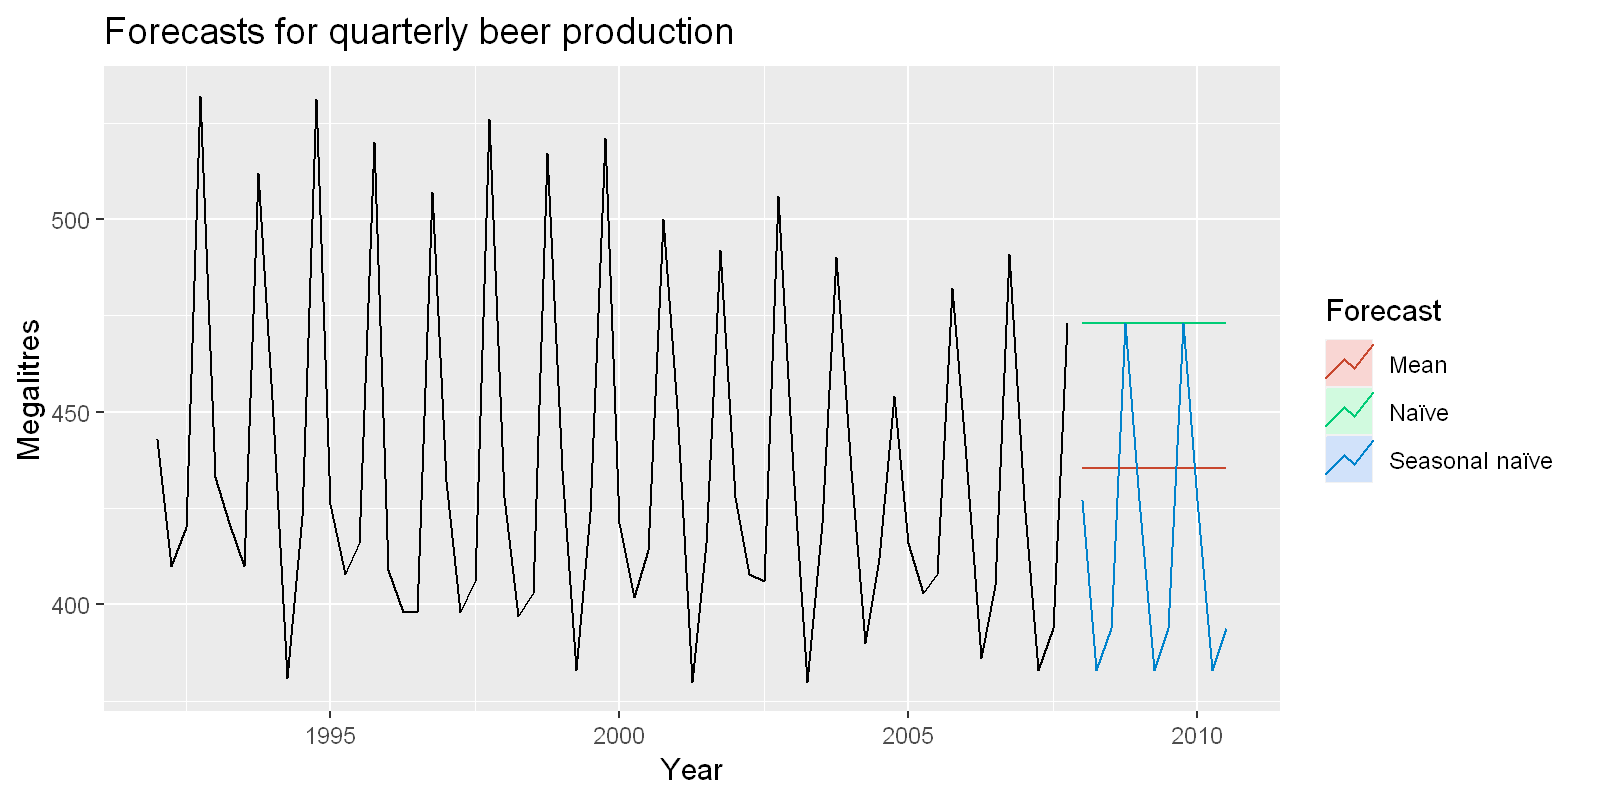

In [20]:
# Set training data from 1992 to 2007
beer2 <- window(ausbeer,start=1992,end=c(2007,4))
# Plot some forecasts
autoplot(beer2) +
  autolayer(meanf(beer2, h=11),
    series="Mean", PI=FALSE) +
  autolayer(naive(beer2, h=11),
    series="Naïve", PI=FALSE) +
  autolayer(snaive(beer2, h=11),
    series="Seasonal naïve", PI=FALSE) +
  ggtitle("Forecasts for quarterly beer production") +
  xlab("Year") + ylab("Megalitres") +
  guides(colour=guide_legend(title="Forecast"))

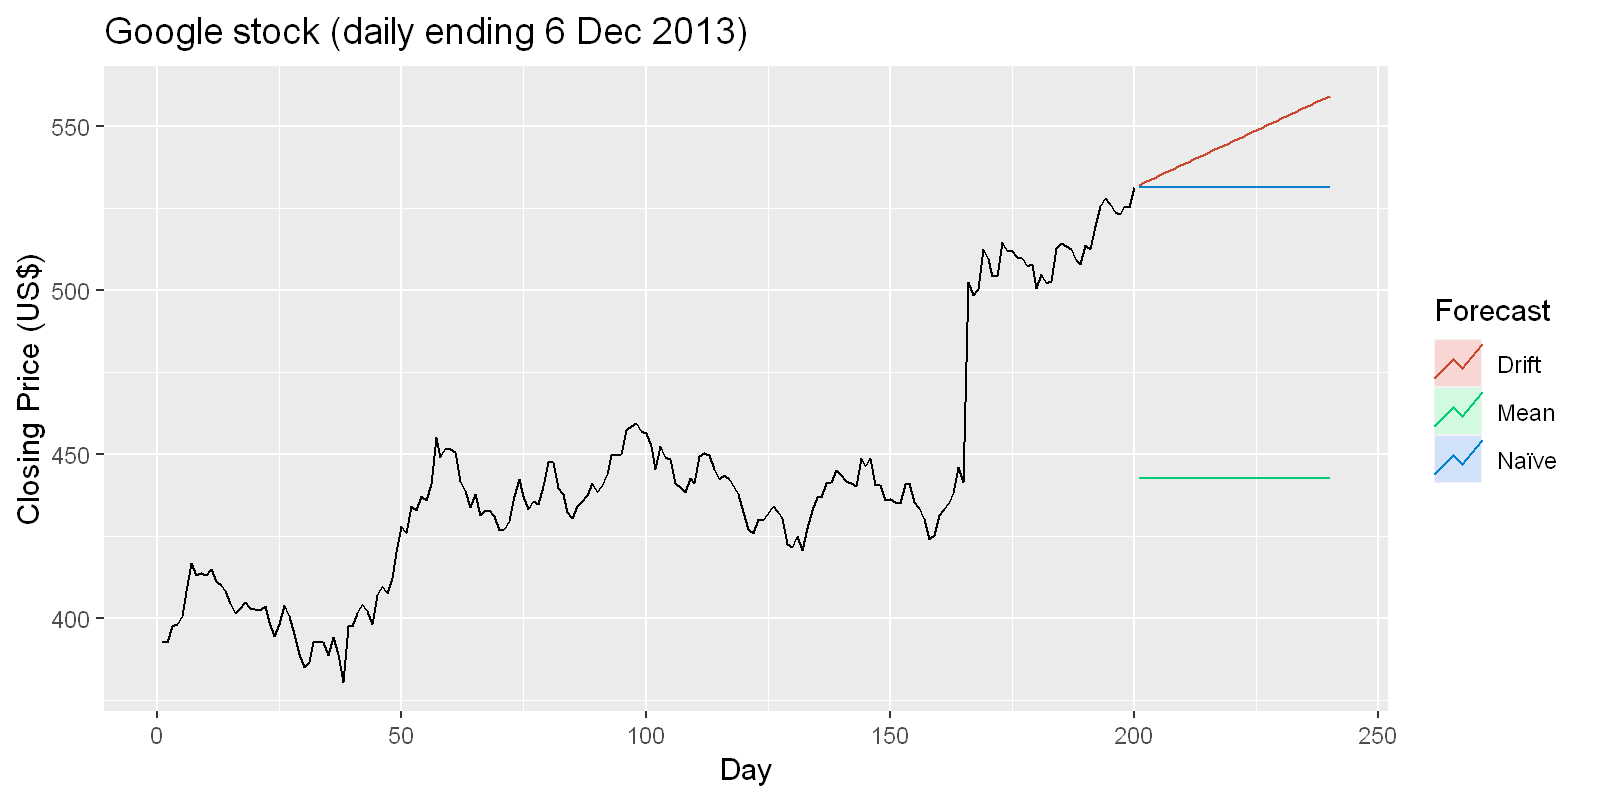

In [21]:
autoplot(goog200) +
  autolayer(meanf(goog200, h=40),
    series="Mean", PI=FALSE) +
  autolayer(rwf(goog200, h=40),
    series="Naïve", PI=FALSE) +
  autolayer(rwf(goog200, drift=TRUE, h=40),
    series="Drift", PI=FALSE) +
  ggtitle("Google stock (daily ending 6 Dec 2013)") +
  xlab("Day") + ylab("Closing Price (US$)") +
  guides(colour=guide_legend(title="Forecast"))

In [23]:
milk

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1962,589,561,640,656,727,697,640,599,568,577,553,582
1963,600,566,653,673,742,716,660,617,583,587,565,598
1964,628,618,688,705,770,736,678,639,604,611,594,634
1965,658,622,709,722,782,756,702,653,615,621,602,635
1966,677,635,736,755,811,798,735,697,661,667,645,688
1967,713,667,762,784,837,817,767,722,681,687,660,698
1968,717,696,775,796,858,826,783,740,701,706,677,711
1969,734,690,785,805,871,845,801,764,725,723,690,734
1970,750,707,807,824,886,859,819,783,740,747,711,751
1971,804,756,860,878,942,913,869,834,790,800,763,800


In [24]:
milk/monthdays(milk)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1962,19.00000,20.03571,20.64516,21.86667,23.45161,23.23333,20.64516,19.32258,18.93333,18.61290,18.43333,18.77419
1963,19.35484,20.21429,21.06452,22.43333,23.93548,23.86667,21.29032,19.90323,19.43333,18.93548,18.83333,19.29032
1964,20.25806,21.31034,22.19355,23.50000,24.83871,24.53333,21.87097,20.61290,20.13333,19.70968,19.80000,20.45161
1965,21.22581,22.21429,22.87097,24.06667,25.22581,25.20000,22.64516,21.06452,20.50000,20.03226,20.06667,20.48387
1966,21.83871,22.67857,23.74194,25.16667,26.16129,26.60000,23.70968,22.48387,22.03333,21.51613,21.50000,22.19355
1967,23.00000,23.82143,24.58065,26.13333,27.00000,27.23333,24.74194,23.29032,22.70000,22.16129,22.00000,22.51613
1968,23.12903,24.00000,25.00000,26.53333,27.67742,27.53333,25.25806,23.87097,23.36667,22.77419,22.56667,22.93548
1969,23.67742,24.64286,25.32258,26.83333,28.09677,28.16667,25.83871,24.64516,24.16667,23.32258,23.00000,23.67742
1970,24.19355,25.25000,26.03226,27.46667,28.58065,28.63333,26.41935,25.25806,24.66667,24.09677,23.70000,24.22581
1971,25.93548,27.00000,27.74194,29.26667,30.38710,30.43333,28.03226,26.90323,26.33333,25.80645,25.43333,25.80645


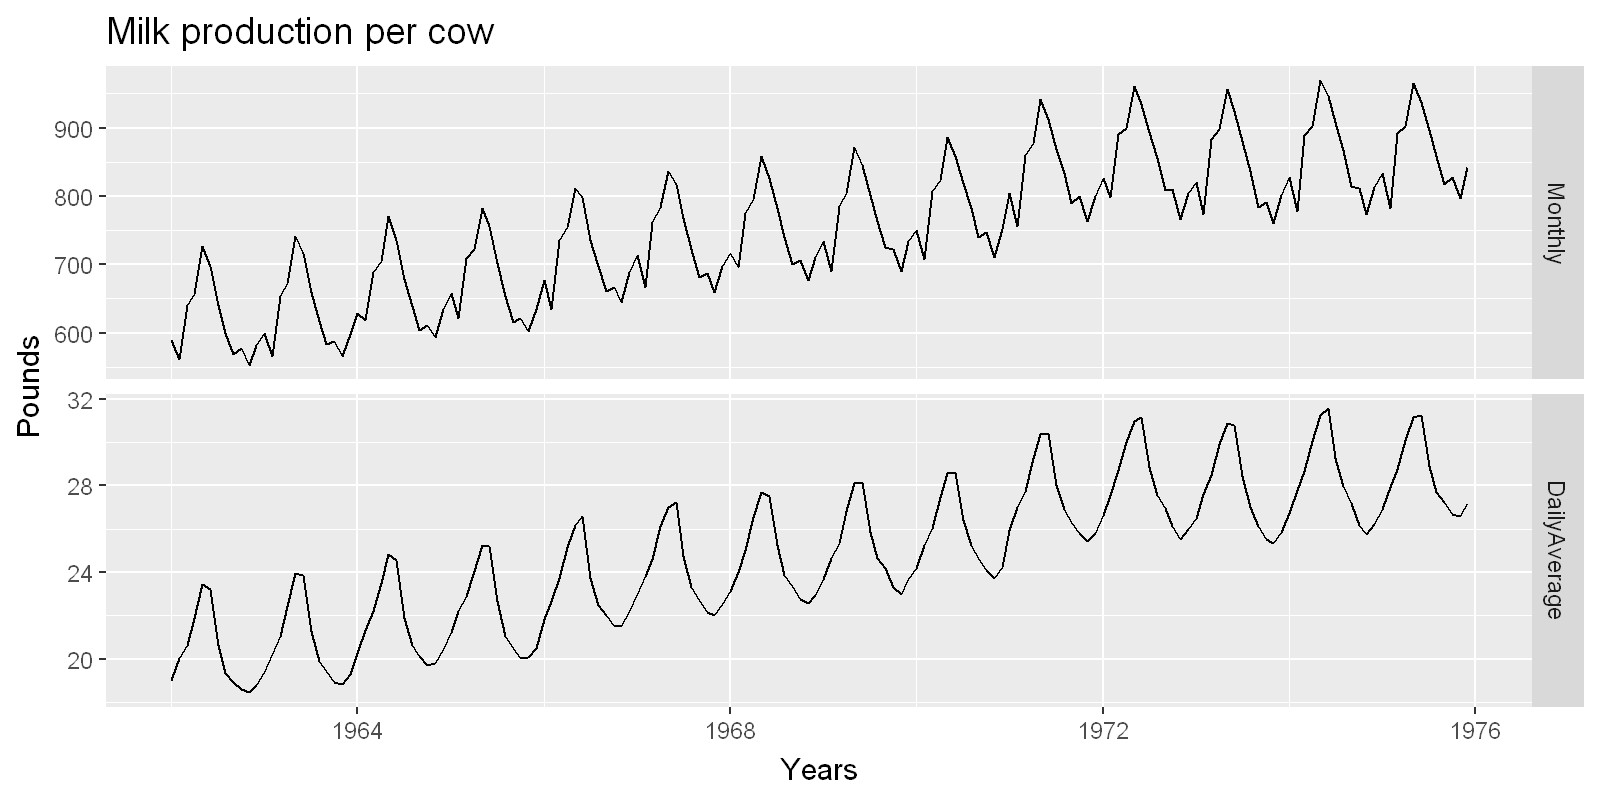

In [22]:
dframe <- cbind(Monthly = milk,
                DailyAverage = milk/monthdays(milk))
  autoplot(dframe, facet=TRUE) +
    xlab("Years") + ylab("Pounds") +
    ggtitle("Milk production per cow")

[1] 0.2654076

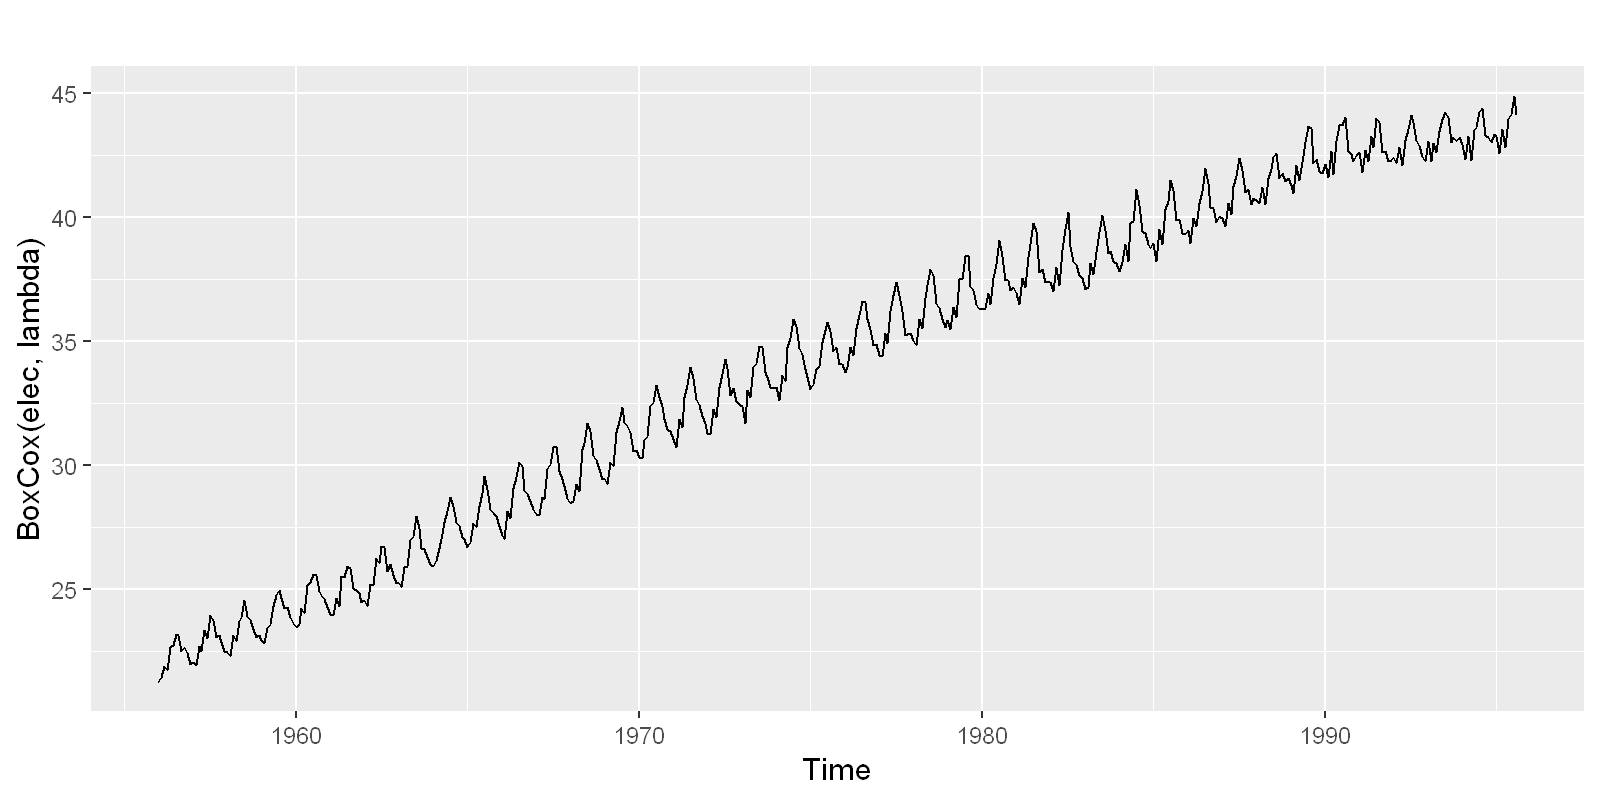

In [26]:
(lambda <- BoxCox.lambda(elec))
autoplot(BoxCox(elec,lambda))

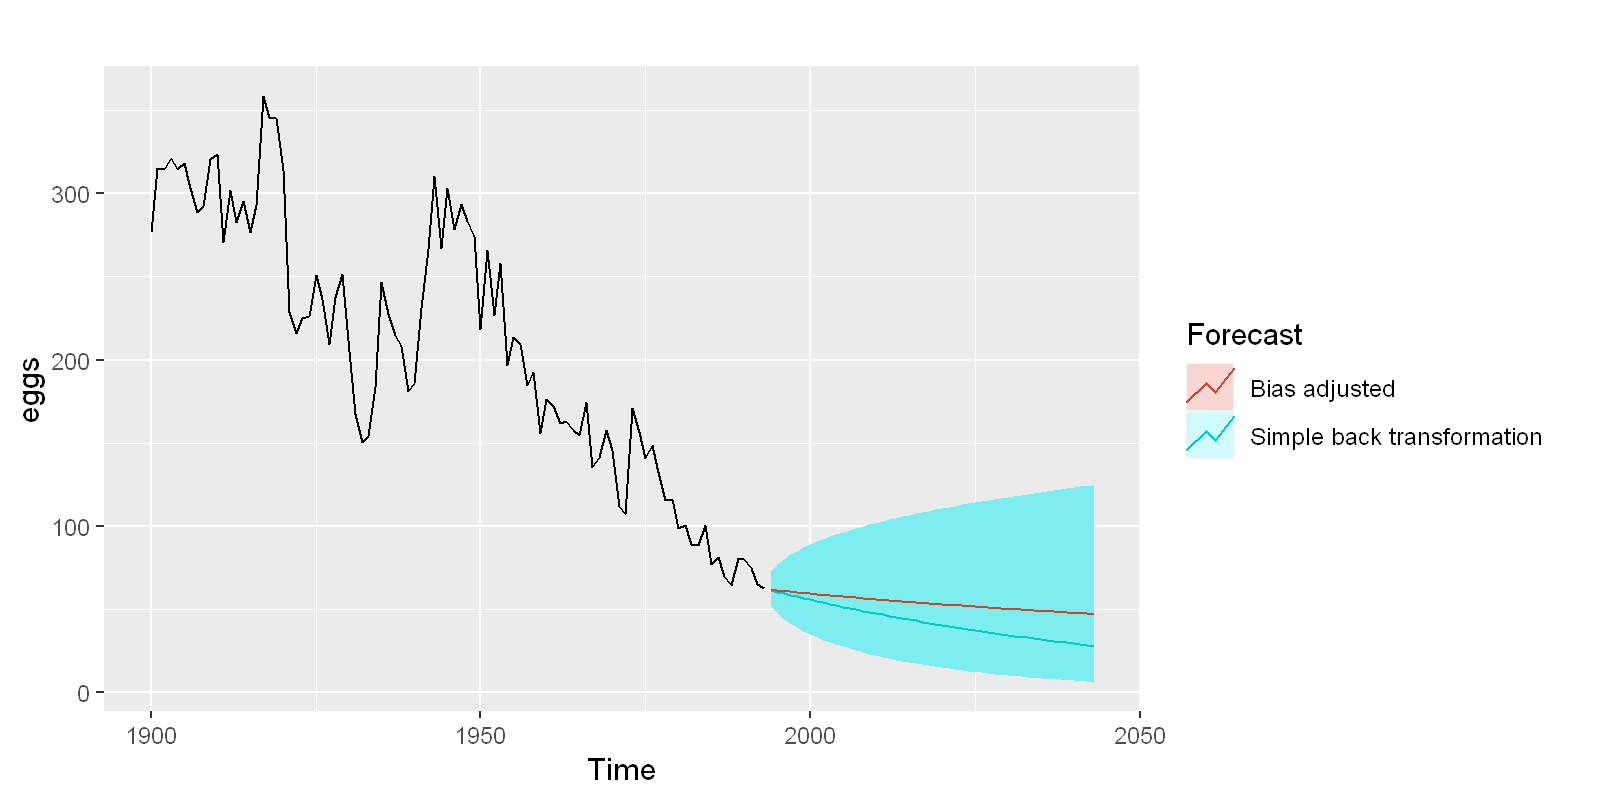

In [27]:
fc <- rwf(eggs, drift=TRUE, lambda=0, h=50, level=80)
fc2 <- rwf(eggs, drift=TRUE, lambda=0, h=50, level=80,
  biasadj=TRUE)
autoplot(eggs) +
  autolayer(fc, series="Simple back transformation") +
  autolayer(fc2, series="Bias adjusted", PI=FALSE) +
  guides(colour=guide_legend(title="Forecast"))


	Ljung-Box test

data:  Residuals from Naive method
Q* = 11.031, df = 10, p-value = 0.3551

Model df: 0.   Total lags used: 10



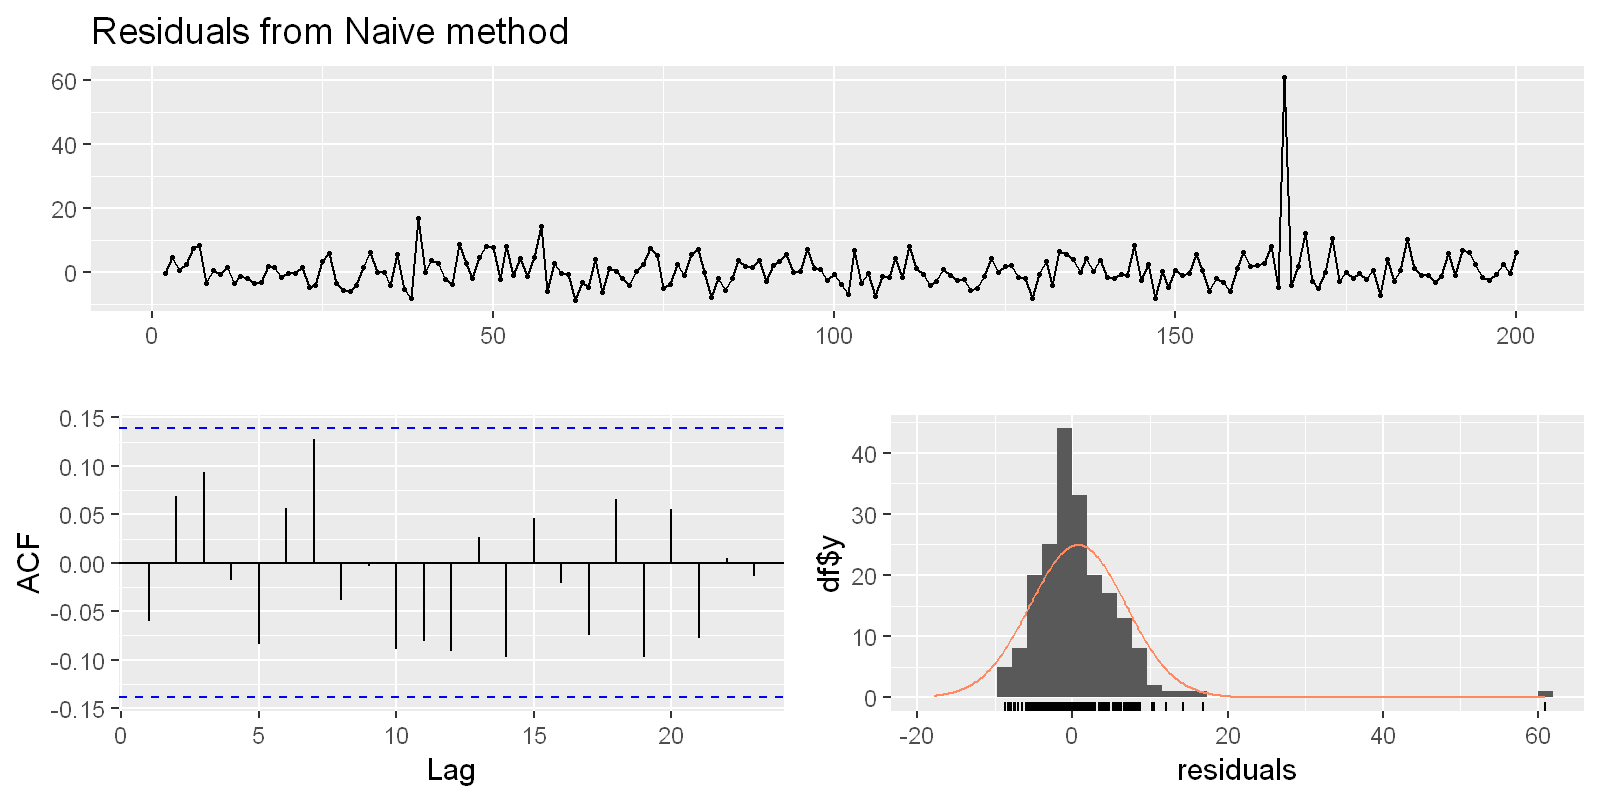

In [28]:
checkresiduals(naive(goog200))

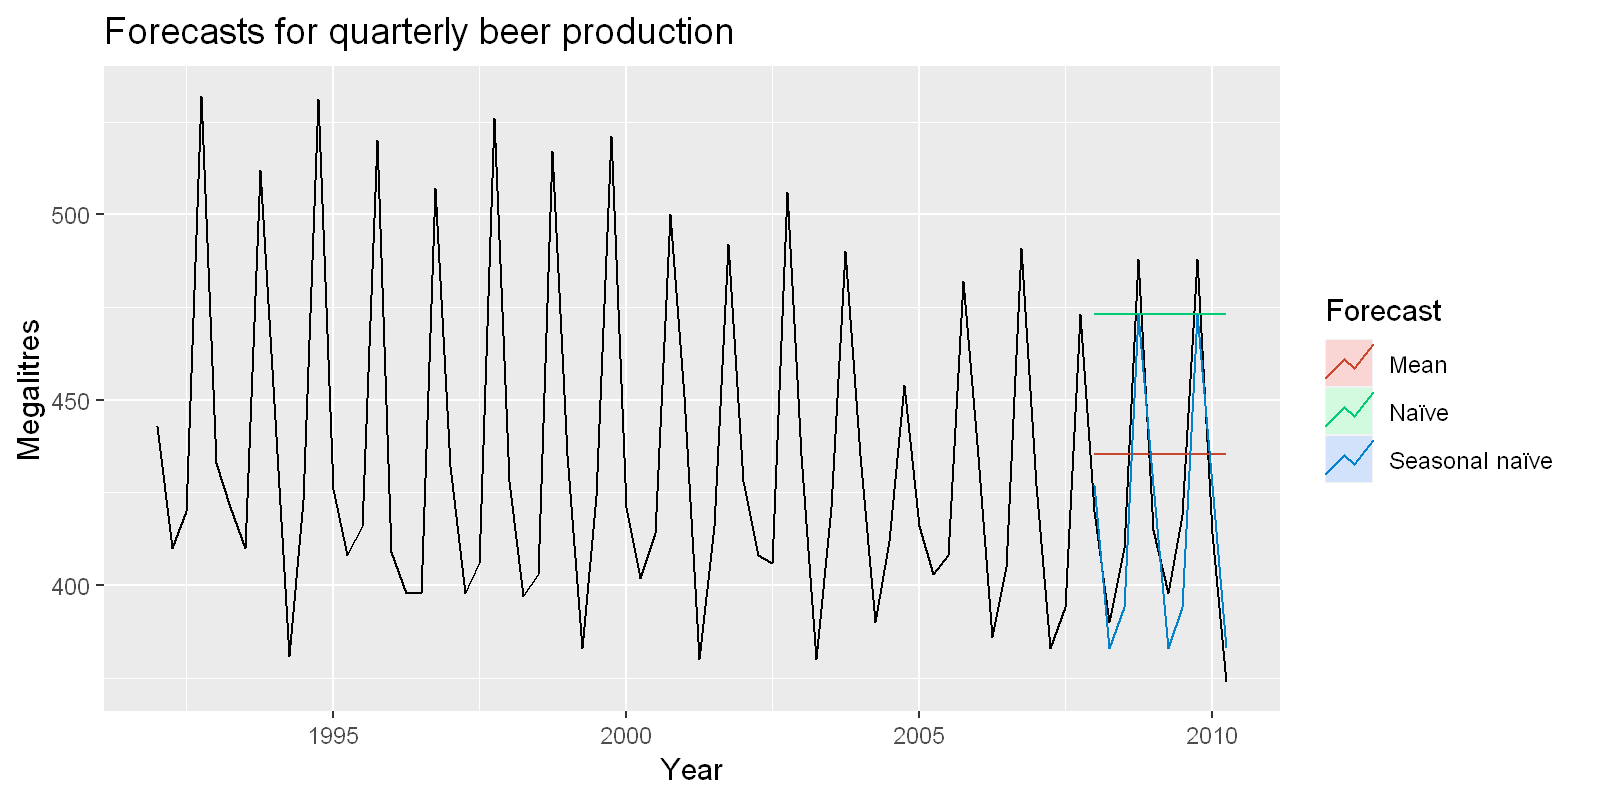

In [29]:
beer2 <- window(ausbeer,start=1992,end=c(2007,4))
beerfit1 <- meanf(beer2,h=10)
beerfit2 <- rwf(beer2,h=10)
beerfit3 <- snaive(beer2,h=10)
autoplot(window(ausbeer, start=1992)) +
  autolayer(beerfit1, series="Mean", PI=FALSE) +
  autolayer(beerfit2, series="Naïve", PI=FALSE) +
  autolayer(beerfit3, series="Seasonal naïve", PI=FALSE) +
  xlab("Year") + ylab("Megalitres") +
  ggtitle("Forecasts for quarterly beer production") +
  guides(colour=guide_legend(title="Forecast"))

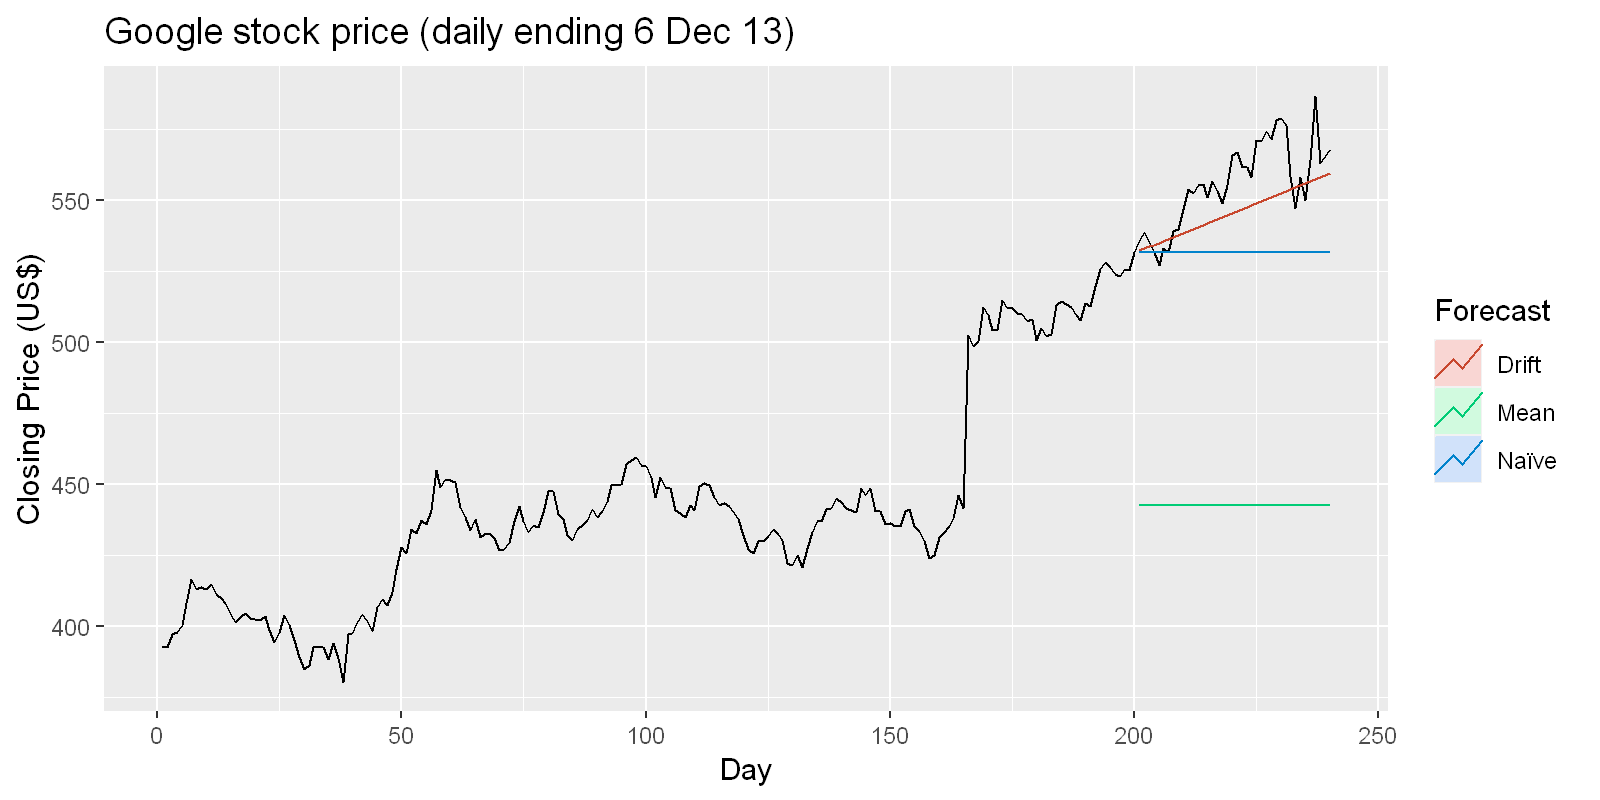

In [30]:
googfc1 <- meanf(goog200, h=40)
googfc2 <- rwf(goog200, h=40)
googfc3 <- rwf(goog200, drift=TRUE, h=40)
autoplot(subset(goog, end = 240)) +
  autolayer(googfc1, PI=FALSE, series="Mean") +
  autolayer(googfc2, PI=FALSE, series="Naïve") +
  autolayer(googfc3, PI=FALSE, series="Drift") +
  xlab("Day") + ylab("Closing Price (US$)") +
  ggtitle("Google stock price (daily ending 6 Dec 13)") +
  guides(colour=guide_legend(title="Forecast"))

In [31]:
googtest <- window(goog, start=201, end=240)
accuracy(googfc1, googtest)
accuracy(googfc2, googtest)
accuracy(googfc3, googtest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-4.296286e-15,36.91961,26.86941,-0.6596884,5.95376,7.182995,0.9668981,NA
Test set,1.132697e+02,114.21375,113.26971,20.3222979,20.32230,30.280376,0.8104340,13.92142


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.6967249,6.208148,3.740697,0.1426616,0.8437137,1.000000,-0.06038617,NA
Test set,24.3677328,28.434837,24.593517,4.3171356,4.3599811,6.574582,0.81043397,3.451903


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-5.998536e-15,6.168928,3.824406,-0.01570676,0.8630093,1.022378,-0.06038617,NA
Test set,1.008487e+01,14.077291,11.667241,1.77566103,2.0700918,3.119002,0.64732736,1.709275


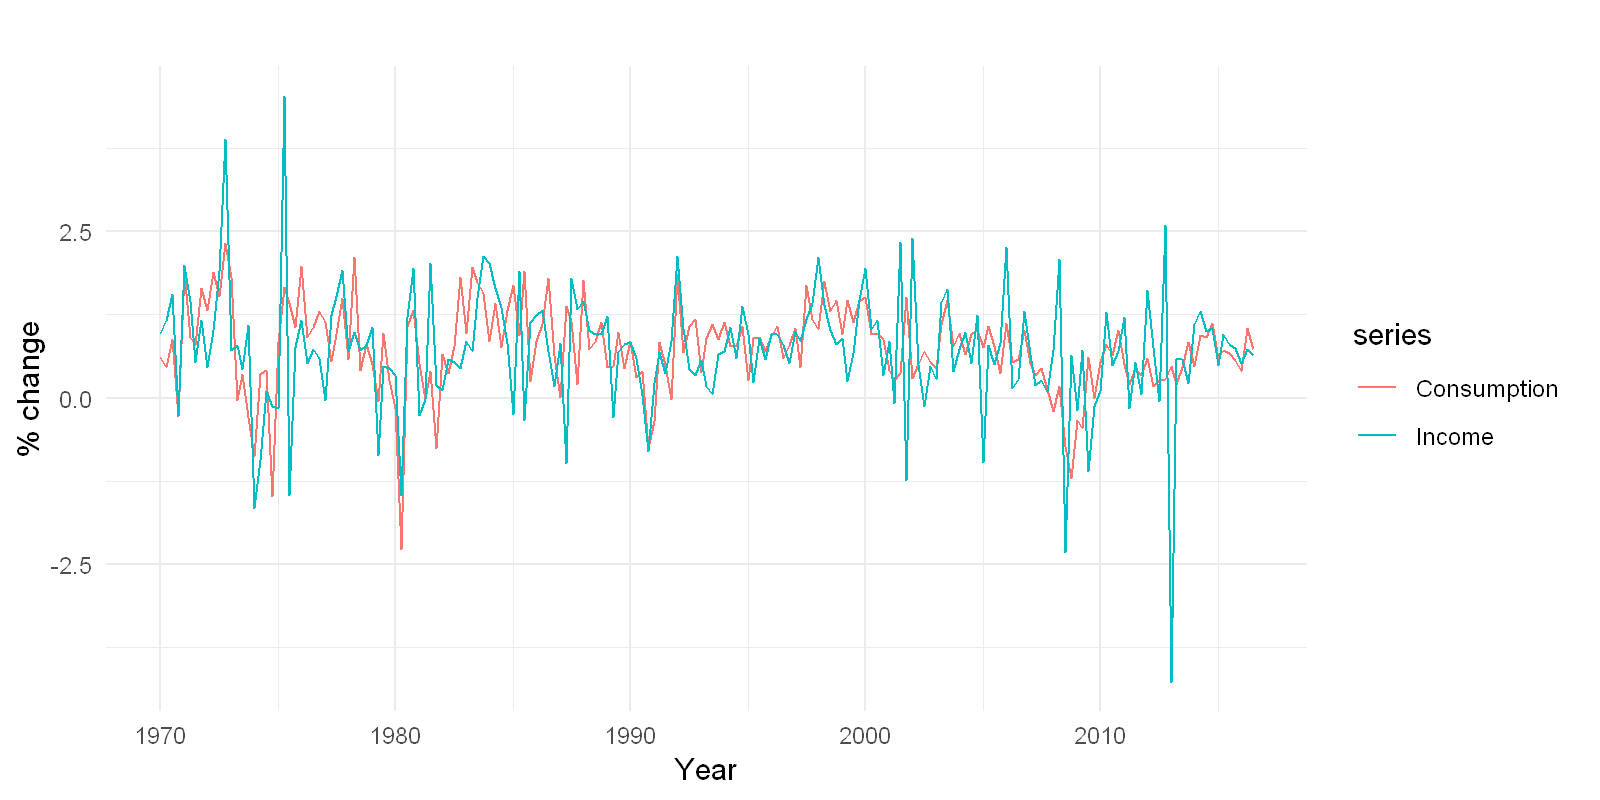

In [34]:
autoplot(uschange[,c("Consumption","Income")]) +
  ylab("% change") + xlab("Year") + theme_minimal()

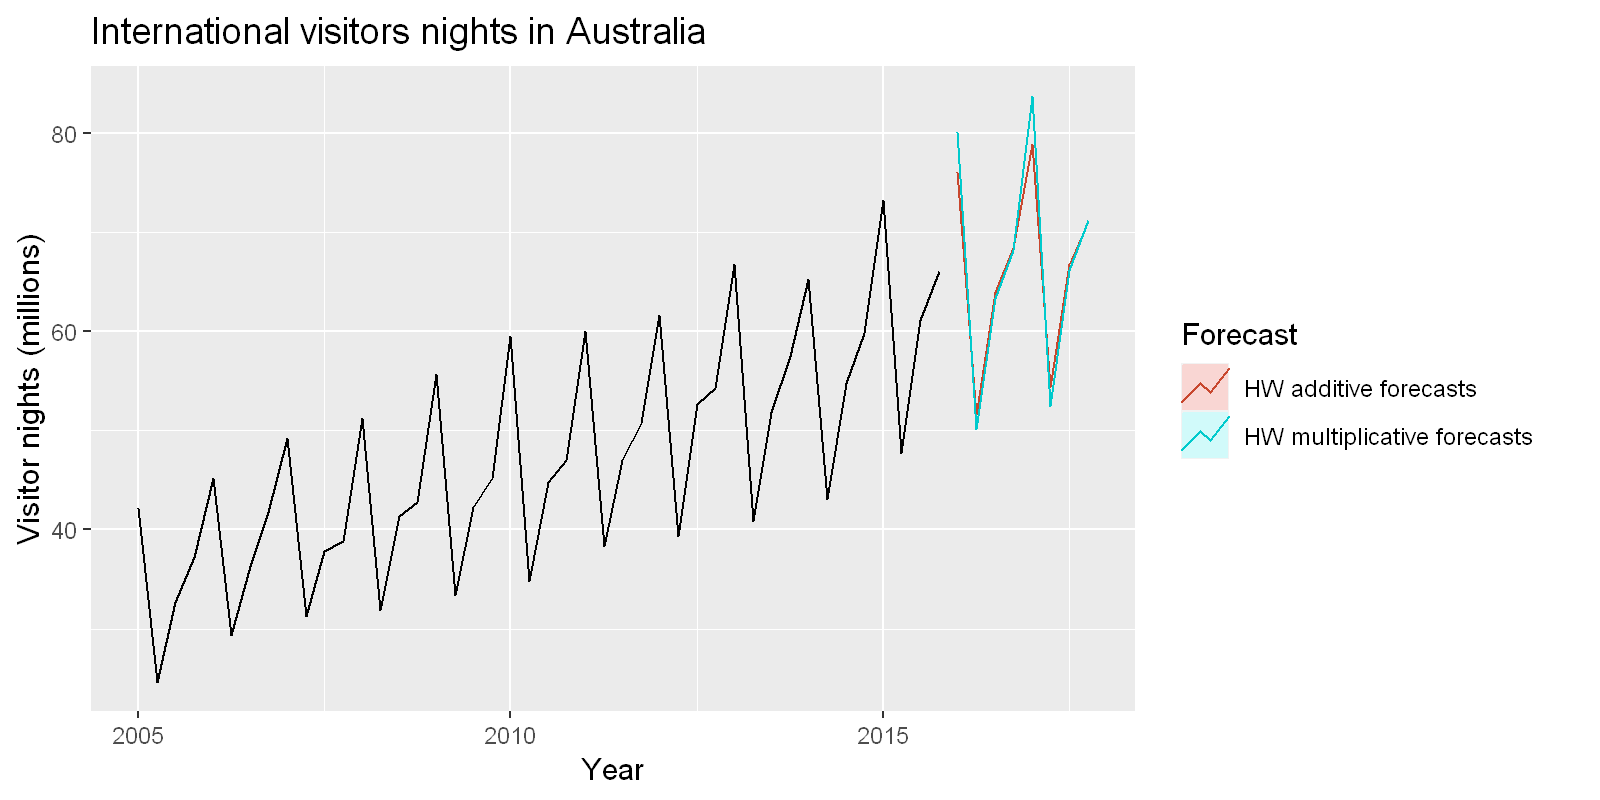

In [37]:
aust <- window(austourists,start=2005)
fit1 <- hw(aust,seasonal="additive")
fit2 <- hw(aust,seasonal="multiplicative")
autoplot(aust) +
  autolayer(fit1, series="HW additive forecasts", PI=FALSE) +
  autolayer(fit2, series="HW multiplicative forecasts",
    PI=FALSE) +
  xlab("Year") +
  ylab("Visitor nights (millions)") +
  ggtitle("International visitors nights in Australia") +
  guides(colour=guide_legend(title="Forecast"))

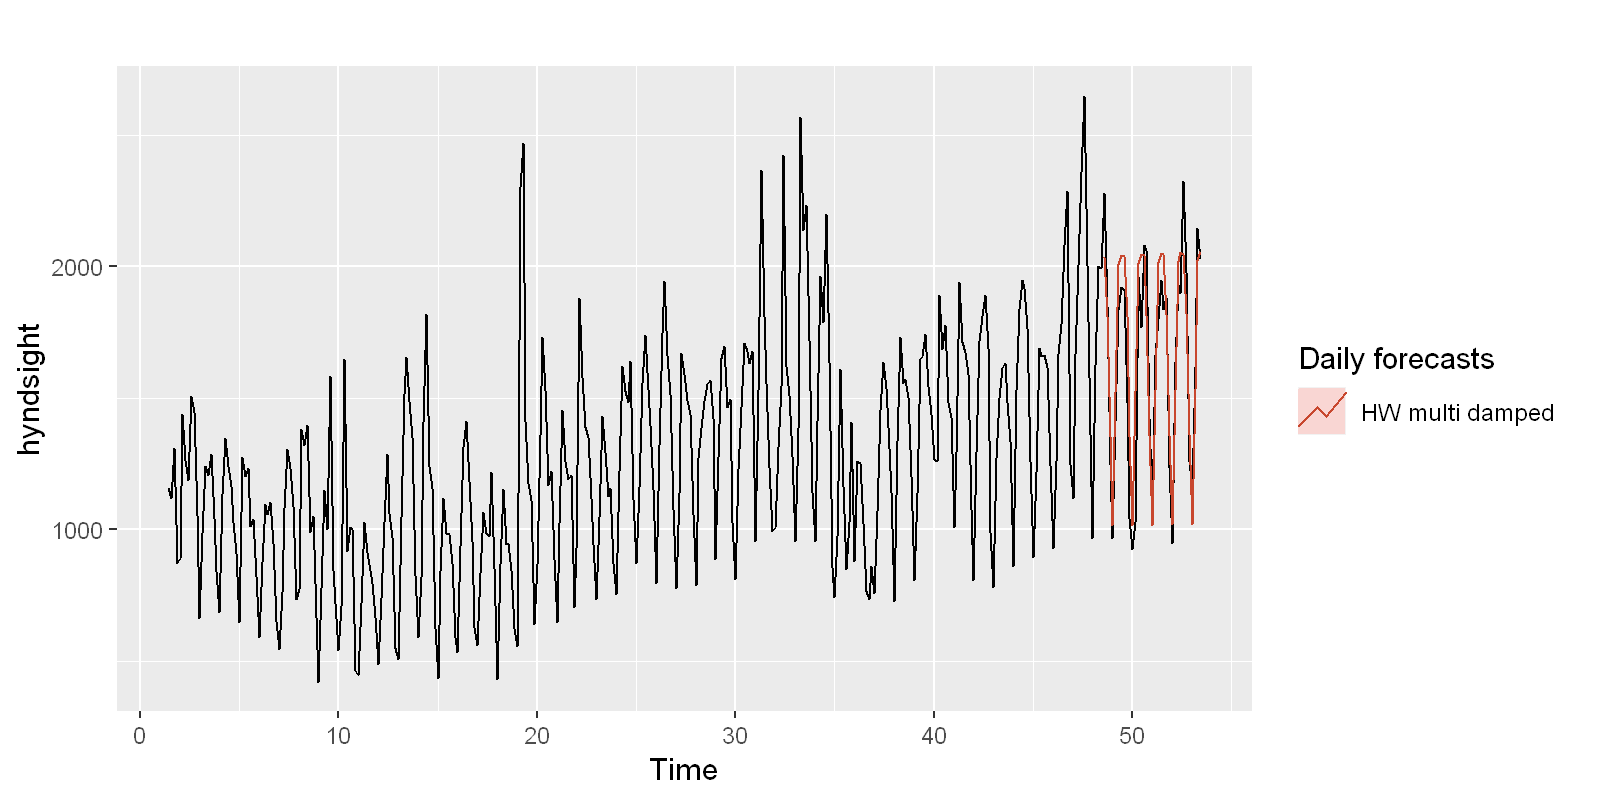

In [39]:
fc <- hw(subset(hyndsight,end=length(hyndsight)-35),
         damped = TRUE, seasonal="multiplicative", h=35)
autoplot(hyndsight) +
  autolayer(fc, series="HW multi damped", PI=FALSE)+
  guides(colour=guide_legend(title="Daily forecasts"))

In [40]:
aust <- window(austourists, start=2005)
fit <- ets(aust)
summary(fit)

ETS(M,A,M) 

Call:
 ets(y = aust) 

  Smoothing parameters:
    alpha = 0.1908 
    beta  = 0.0392 
    gamma = 2e-04 

  Initial states:
    l = 32.3679 
    b = 0.9281 
    s = 1.0218 0.9628 0.7683 1.2471

  sigma:  0.0383

     AIC     AICc      BIC 
224.8628 230.1569 240.9205 

Training set error measures:
                     ME     RMSE     MAE        MPE     MAPE     MASE      ACF1
Training set 0.04836907 1.670893 1.24954 -0.1845609 2.692849 0.409454 0.2005962

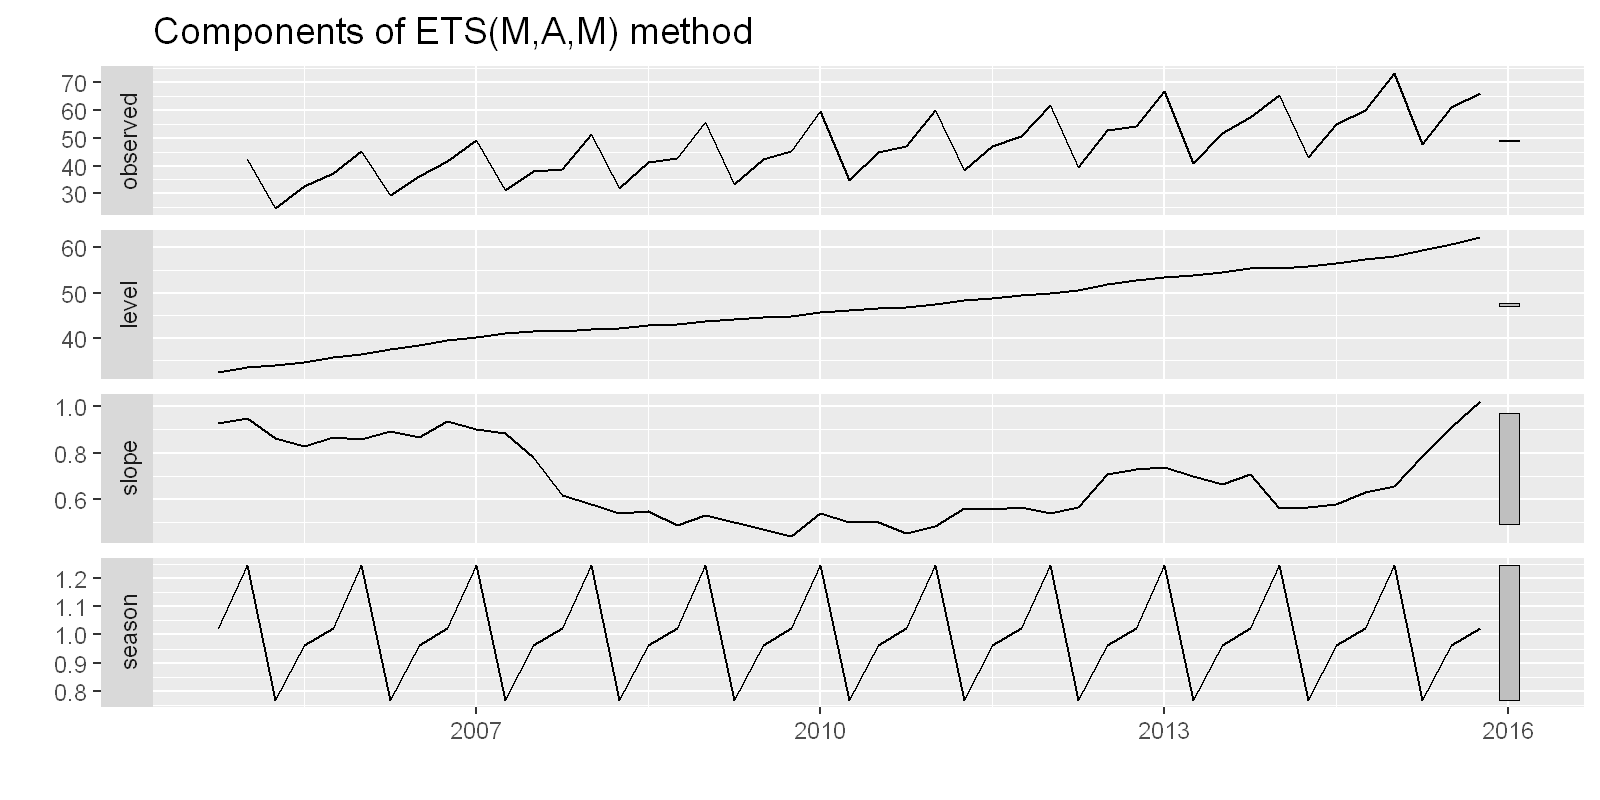

In [41]:
autoplot(fit)

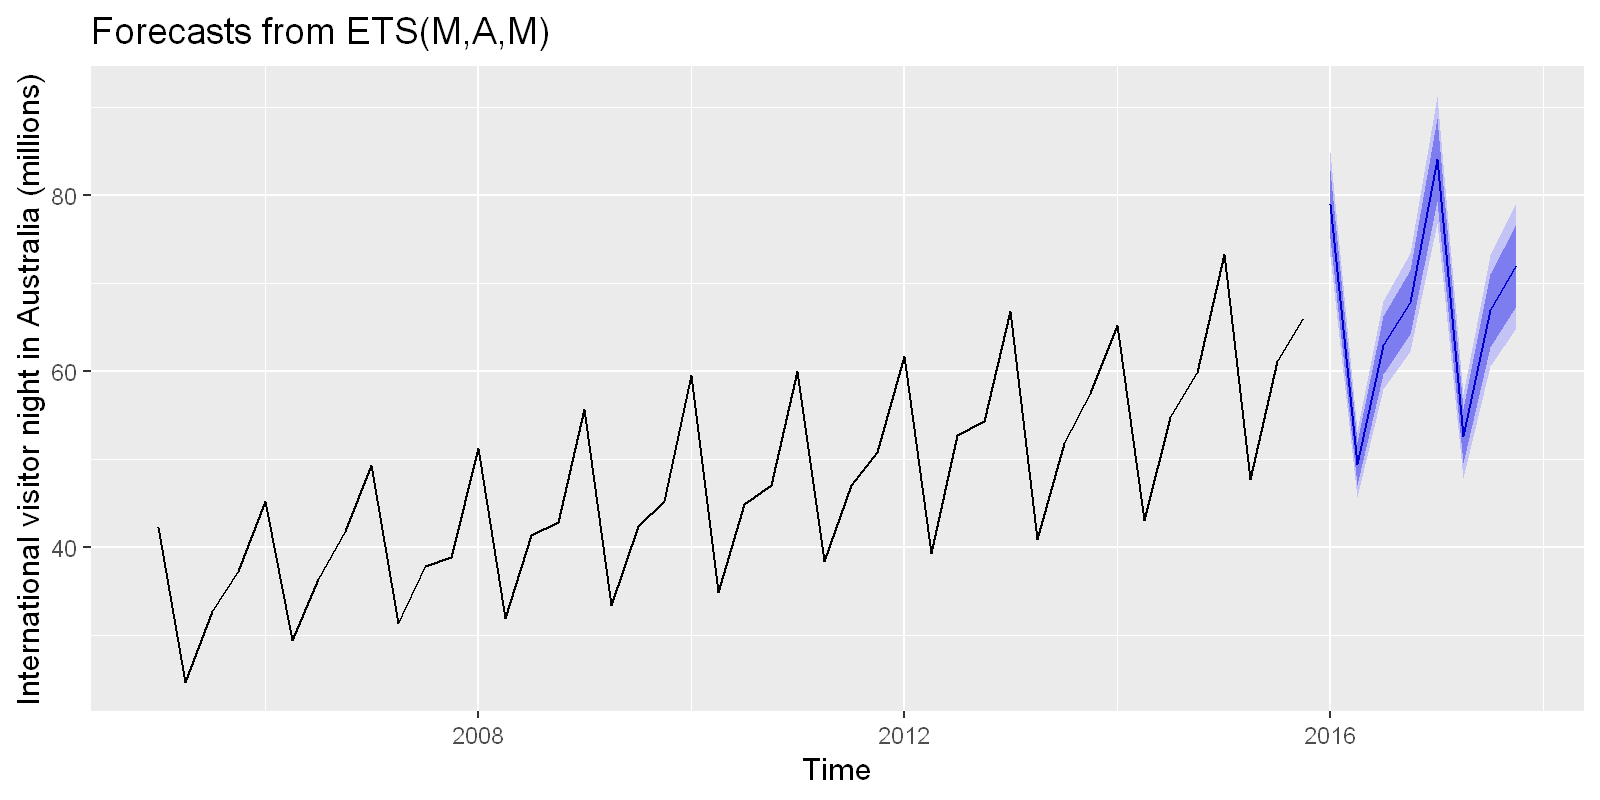

In [42]:
fit %>% forecast(h=8) %>%
  autoplot() +
  ylab("International visitor night in Australia (millions)")

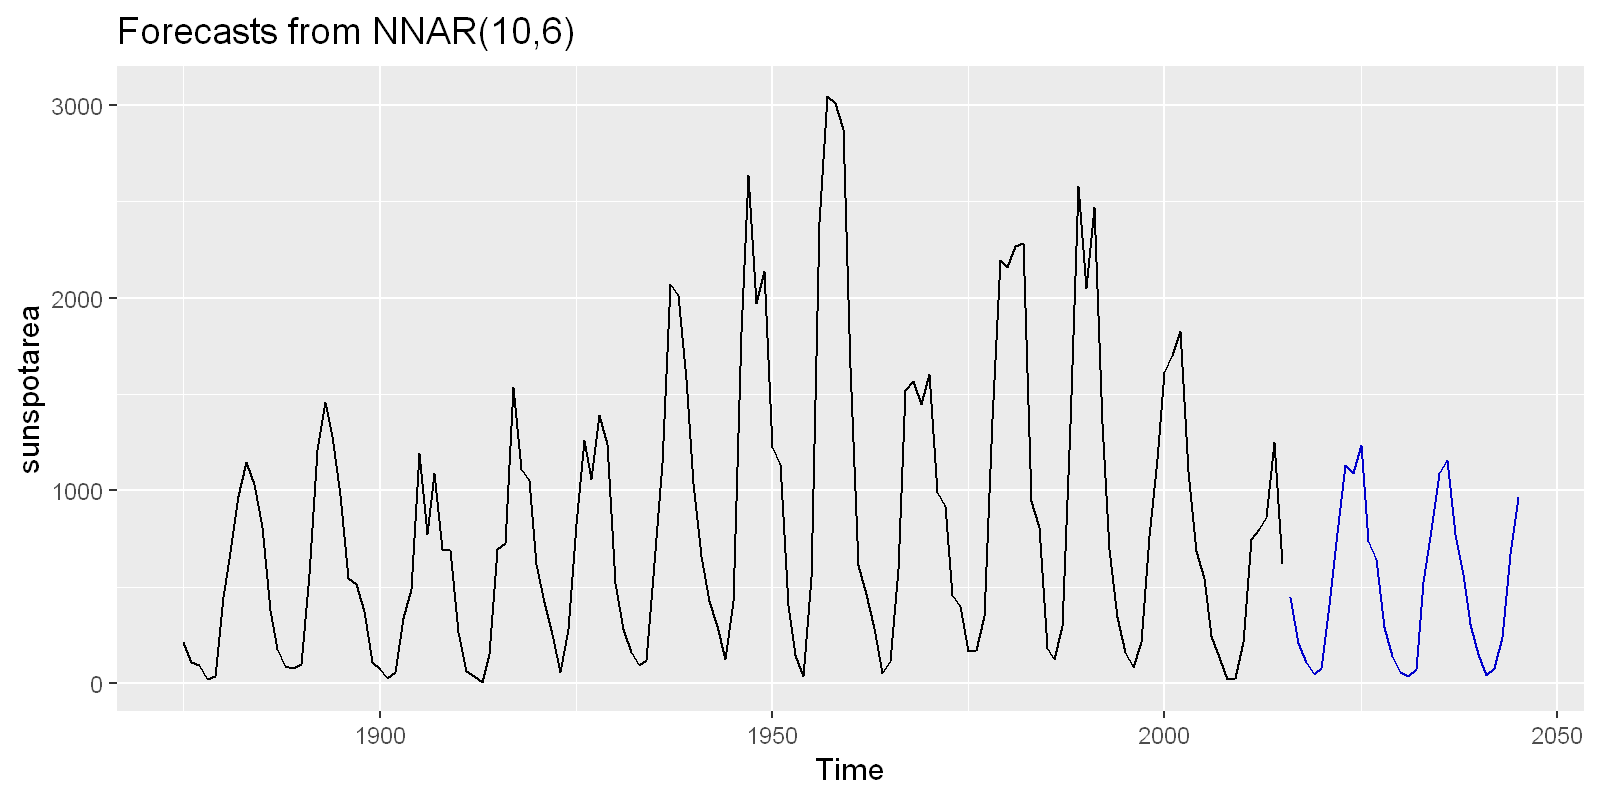

In [44]:
fit <- nnetar(sunspotarea, lambda=0)
autoplot(forecast(fit,h=30))

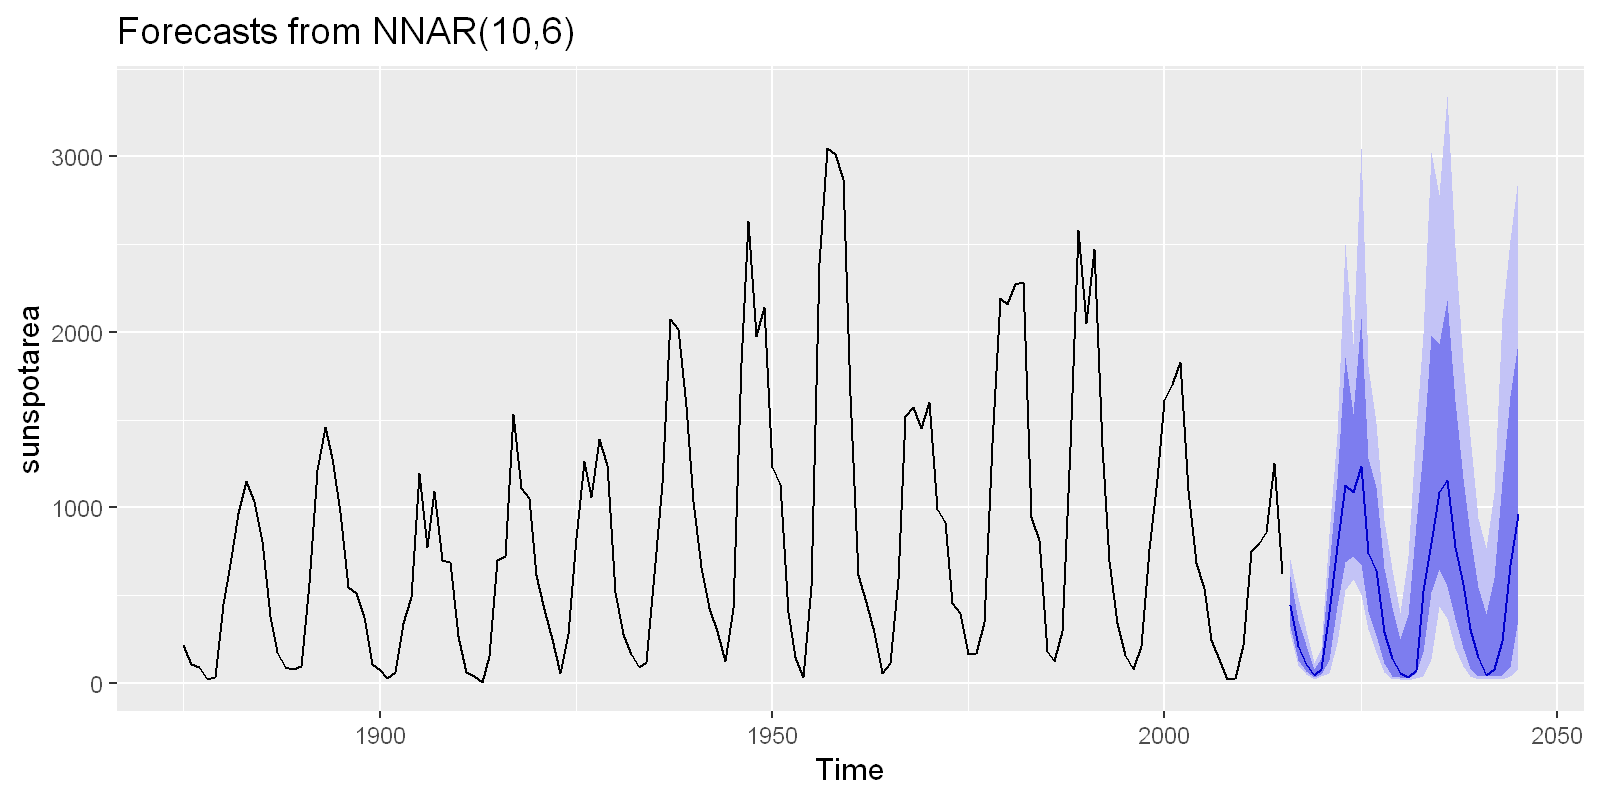

In [45]:
fcast <- forecast(fit, PI=TRUE, h=30)
autoplot(fcast)